0|0|0|0




parent 0

child 0

parent 0

child 1

parent 0

child 2

parent 0

child 3
save_states[parent] [0, 0, 0, 0]
parent 1
child 4

parent 1

child 4

parent 1

child 5

parent 1

child 6
save_states[parent] [1, 0, 0, 0]

parent 2

child 7
parent 2
child 8

parent 2

child 8

parent 2

child 9
save_states[parent] [0, 1, 0, 0]

parent 3

child 10

parent 3

child 11
parent 3
child 12

parent 3

child 12
save_states[parent] [0, 0, 1, 0]

parent 4

child 13

parent 4

child 14

parent 4

child 15
parent 4
child 16
save_states[parent] [0, 0, 0, 1]
parent 5
child 16
parent 5
child 16

parent 5

child 16

parent 5

child 17
save_states[parent] [1, 1, 0, 0]
parent 6
child 18

parent 6

child 18
parent 6
child 19

parent 6

child 19
save_states[parent] [1, 0, 1, 0]
parent 7
child 20

parent 7

child 20

parent 7

child 21
parent 7
child 22
save_states[parent] [1, 0, 0, 1]
parent 8
child 22
parent 8
child 22

parent 8

child 22

parent 8

child 23
save_states[parent] [1, 1, 0, 0]

parent 

9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0


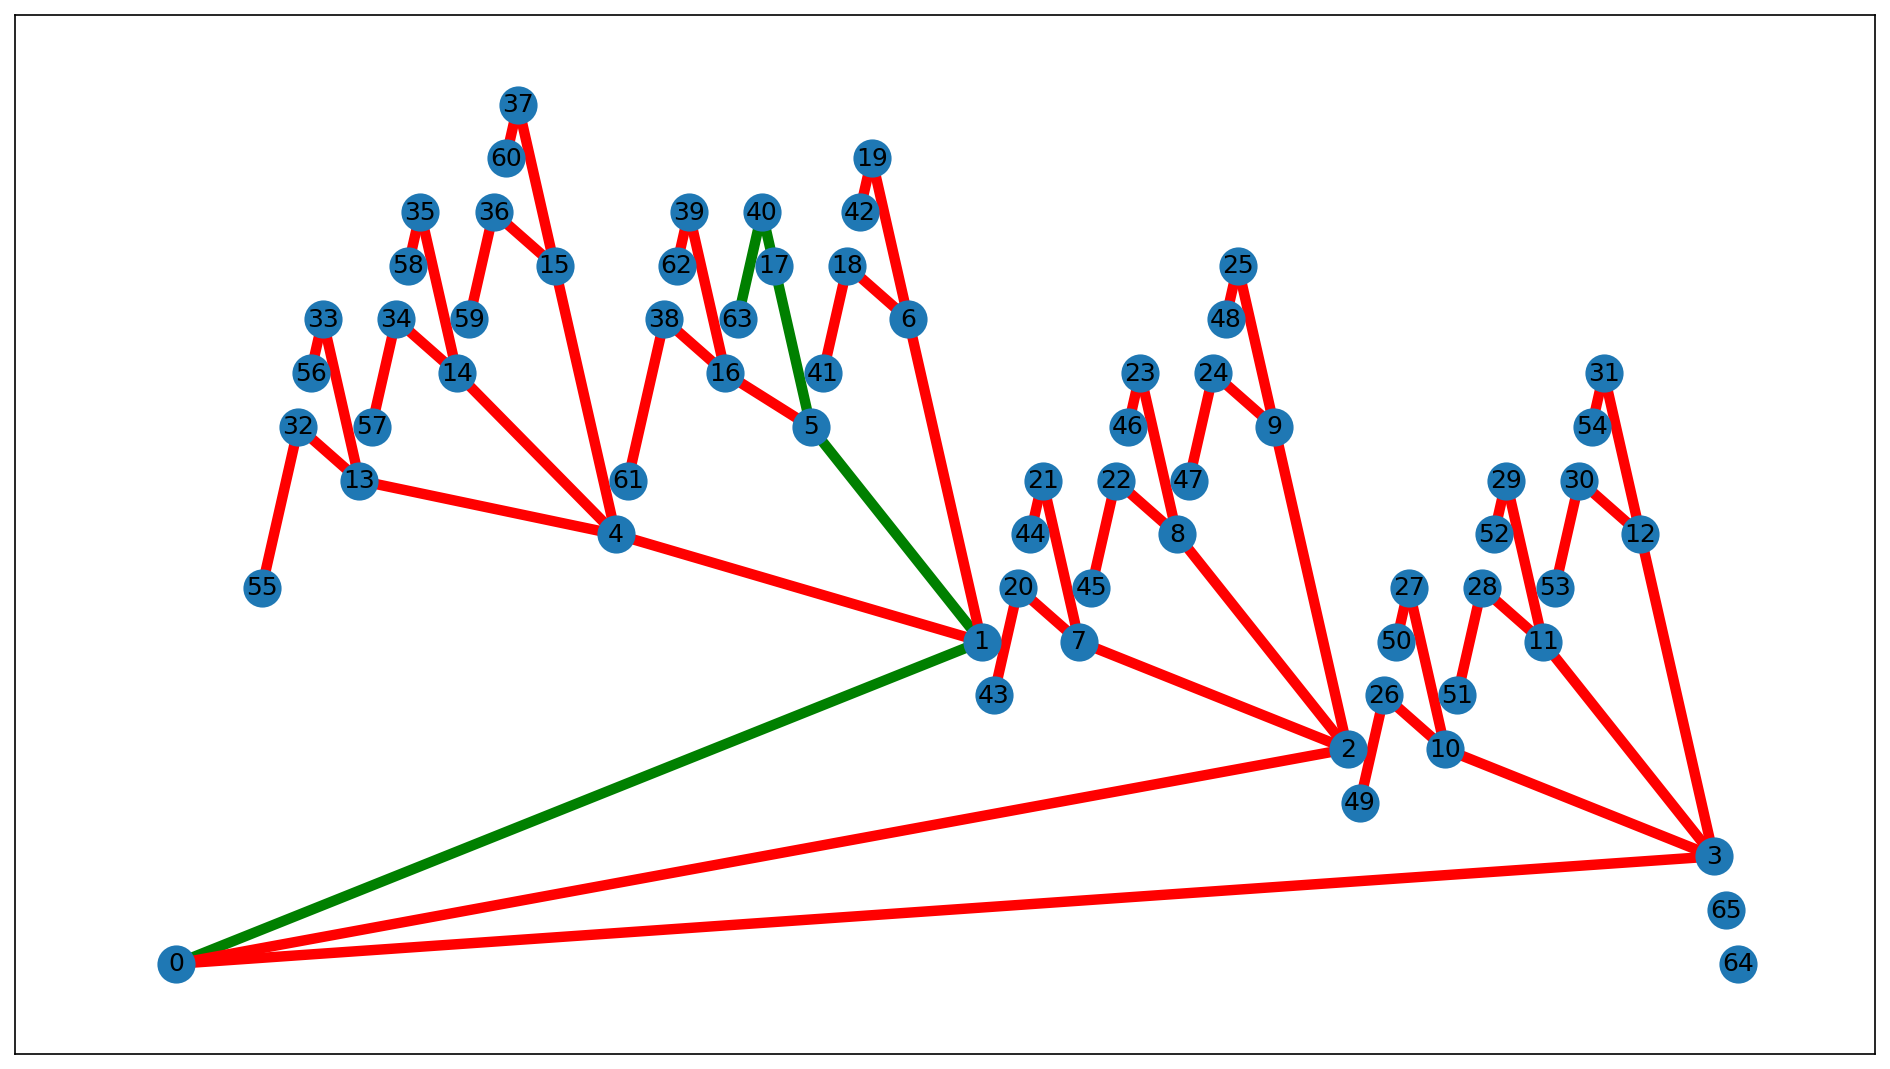

In [1]:
from IPython.display import clear_output
import math
import networkx as nx
import sys


l = list()
frames = []
import sys
import numpy as np 

import matplotlib.pyplot as plt
import glob
from PIL import Image

class tiktiktoe:
    def __init__(self, size):
        self.board = [0]*size
        self.turn = 1
        self.size=size
        self.depth=0
        self.save_states=[]
        self.graph_matr=[]
    def display_board(self):
        for i in range(0, self.size**2, self.size):
            print('|'.join(str(x) for x in self.board[i:i+self.size]))
    def make_move(self,position):
        if self.board[position] == 0:
            self.board[position] = self.turn
            if self.turn == 1:
                print("\nPlayer 1 placed in location:",position,"\n")
                self.turn = 2
            else:
                print("\nPlayer 2 placed in location:",position,"\n")
                self.turn = 1
        else:
            print('\nThis position is already taken. Please choose another one.\n')
        
    def get_winner(self):
        state=0
        for place in range(len(self.board)-2):
            if self.board[place]!=0 and self.board[place+1]!=0 and self.board[place+2]!=0:
                if self.turn == 1:
                    return 2
                else: return 1
        return None
    
    def generate_graph(self):
        empty_spaces = self.board.count(0)
        save_states=[]
        save_states.append(self.board.copy())
        parent=0
        graph_matr=[[0,0],[0,0]]
        end_cnt=0
        child=0
        save_st_tmp=self.board.copy()
        if self.depth==0:
           # while end_cnt <= math.factorial(empty_spaces):
                while parent<=len(save_states):
                    for i in range(len(self.board)):
                        #print("save_states", save_states)
                        #print("\nsave_states[parent][i]",save_states[parent][i])
                        
                        if save_states[parent][i]==0:
                            save_st_tmp=save_states[parent].copy()   
                            save_st_tmp[i]=1
                            save_states.append(save_st_tmp.copy())

                            print("\nparent", parent)
                            print("\nchild", child) 
                            
                        
                            graph_matr[parent][child]=1 
                            #print("graph_matr",graph_matr)
                            child+=1
                            graph_matr.append([0] * (len(graph_matr[0])))
                            for row in graph_matr:
                                row.append(0)
                        else: 
                            print("parent", parent)
                            print("child", child)
                            graph_matr[parent][child]=0
                            #child+=1
                            
                            
                    print("save_states[parent]", save_states[parent])
                    for i in range(len(save_states[parent]) - len([1, 1, 1]) + 1):
                        if save_states[parent][i:i+len([1, 1, 1])] == [1, 1, 1]:
                            end_cnt+=1
                            print("end_cnt",end_cnt)
                    if parent==child:
                        break
                    parent+=1
        #print("save_states",save_states)
        #print("graph_matr",graph_matr)
        self.save_states=save_states.copy()
        self.graph_matr=graph_matr.copy()
        return  save_states, graph_matr              
        
                    


def matrix_to_unset(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        node = i
        neighbors = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                neighbors.append(j)
        graph[node] = neighbors
    return graph

def bfs(graph, start, end, l):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        l.append(path)
        print(path)
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)




# create a new game with board size of 9
game = tiktiktoe(4)
#game.make_move(0)
l=[]
#game.make_move(2)

# print the initial board
game.display_board()

data=game.generate_graph()

#print("data",data)

data[1][0][0]=0

M=matrix_to_unset(data[1])

#print('M',M)
last_non_empty=0
for k in reversed(sorted(M.keys())):
    if bool(M[k]):
        last_non_empty = M[k]
        break

fin_path=bfs(M,0,last_non_empty,l)

# Графические настройки
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11



#edge weight labels
G = nx.Graph(M)
pos = nx.planar_layout(G)
edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels);
print(G)
#nx.draw(G, pos, edge_color=color_map);
j = 0
prev = None
visited=[]

for i,j in G.edges:
    G.add_edge(i,j, color = 'black')
starting_frame=0
pos = nx.planar_layout(G)
j=0
for path in l:
    for i in path:
        if prev != None:
            #G.add_edge(prev, i, color = 'red')
            #if prev in visited:
            #    G.add_edge(prev, i, color = 'black')
            #else:
            #    G.add_edge(prev, i, color = 'red')
            
            if i<=prev:
                print(prev,i)
            else:
                G.add_edge(prev, i, color = 'red')
            
            edges = G.edges()
            colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
            nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=5)
            #print(G, pos, colors)
            #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
#             plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{j:003}.png', dpi = 150, bbox_inches='tight')
            if starting_frame==0:
                starting_frame=j
            plt.close()
            visited.append(prev)
            j=j+1
        else:
            pass
        prev = i
        

for dot in range(len(path)-1):
    G.add_edge(path[dot], path[dot+1], color = 'green')

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=5)
#print(G, pos, colors)
#plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
# plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png', dpi = 150, bbox_inches='tight')
plt.close()
visited.append(prev)
        

#for i in l:
#    G.add_edge(j, i, color = 'red')
#    j = i

#склейка кадров

# for i in range (starting_frame,j):
#     #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
#     frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:003}.png')
#     frames.append(frame)
# frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png')
# for i in range (20):
#     frames.append(frame)

#Превращаем в гифку

#frames[0].save(
#    'R:/fig/graph/test.gif',
#    save_all = True,
#    append_images = frames[1:],
#    optimize = True,
#    duration = 500,
#    loop = 0
#)

# frames[0].save(
#     '/Users/died_mau5/Desktop/ZEZIN/TRASH/game.gif',
#     save_all = True,
#     append_images = frames[1:],
#     optimize = True,
#     duration = 100,
#     loop = 0
# )
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=5)

# # loop until there's a winner or the board is full
# while not game.get_winner() and 0 in game.board:
#     # get the current player's move
#     position = int(input("Player " + str(game.turn) + " - Enter a position to place your mark: "))

#     # make the move
#     game.make_move(position)

#     # print the updated board
#     game.display_board()

#     # clear the output
#     clear_output(wait=True)

# # check if there's a winner or if the board is full
# if game.get_winner():
#     print("Player " + str(game.get_winner()) + " wins!")




In [2]:
from IPython.display import clear_output
import math
import networkx as nx
import sys
l = list()
frames = []
import sys
import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random

class tiktiktoe:
    def __init__(self, size):
        self.board = [0]*size
        self.turn = 1
        self.size=size
        self.depth=0
        self.depths=[]
        self.save_states=[]
        self.graph_matr=[]
        self.matr_unset={}
        self.l=[]
        self.path=[]
        self.player=1
        self.winning_nodes=[]
    def display_board(self):
            # Display the column numbers above the board
            col_nums = ' '.join(str(i).center(2) for i in range(self.size))
            print(' ' + col_nums.rjust(self.size*2+1))

            # Display the board with '||' separating each cell
            board_str = '|' + '|'.join(str(x).center(2) for x in self.board) + '|'
            print(board_str)


    def make_move(self,position):
        if self.board[position] == 0:
            self.board[position] = 1  #self.turn
        else:
            print('\nThis position is already taken. Please choose another one.\n')
        
    def get_winner(self):
        state=0
        for place in range(len(self.board)-2):
            if self.board[place]!=0 and self.board[place+1]!=0 and self.board[place+2]!=0:
                if self.turn == 1:
                    return 1
        return None
    
    def bfs(graph, start, end, l):
        queue = []
        queue.append([start])
        #print("BFS_start")
        while queue:
            path = queue.pop(0)
            node = path[-1]
            l.append(path)
            #print(path)
            if node == end:
                return path
            for adjacent in graph.get(node, []):
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)
        
    
    def matrix_to_unset(self):
        graph = {}
        num_nodes = len(self.graph_matr)
        self.graph_matr[0][0]=0 #костыль чтобы убрать связь 0 с 0 

        for i in range(num_nodes):
            node = i
            neighbors = []
            for j in range(num_nodes):
                if self.graph_matr[i][j] != 0:
                    neighbors.append(j)
            graph[node] = neighbors
        self.matr_unset=graph.copy()
    
    def get_node_depths(self):
        # Create an array to store the depth of each node
        self.matrix_to_unset()
        #print(self.matr_unset)
        depth_array = [-1] * len(self.matr_unset)

        # Define a helper function to traverse the tree recursively
        def traverse(node, depth):
            #print("node",node,"depth",depth)
            depth_array[node] = depth
            for child in self.matr_unset[node]:
                traverse(child, depth+1)

        # Start the traversal from the root node (position 0)
        traverse(0, 0)
        self.depths=depth_array.copy()
    
    
    def generate_win_locations(self):
        #print("generate_win_locations")
        self.winning_nodes = [0] * len(self.save_states)
        for parent in self.matr_unset:
            pos = self.save_states[parent]
            #print(parent)
            if self.winning_nodes[parent]!=2:
                for j in range(len(pos) - 2):
                    if pos[j] == pos[j+1] == pos[j+2] == 1:
                        self.winning_nodes[parent] = 1
                        for child in self.matr_unset[parent]:
                            self.winning_nodes[child] = 2
                        break
        
    def find_win_basic(self):
        self.generate_graph()
        self.matrix_to_unset()
        self.get_node_depths()
        self.generate_win_locations()
        #print("depths",self.depths)
        #print("save_states",self.save_states)
        #print("self.winning_nodes",self.winning_nodes)
        #print("len",len(self.save_states))
        #print("len depths",len(self.depths))
        for i in range(len(self.depths)):
            #print("self.depth[i]")
            if (self.depths[i] % 2 !=0 ) and (self.winning_nodes[i]==1):
                self.path=bfs(self.matr_unset, 0, i, self.l)
                return
        self.path=bfs(self.matr_unset, 0, len(self.depths), self.l)
        return
            
        
        
        
        
#     def find_win_basic(self, player_input):
#         self.generate_graph(player_input)
#         self.matrix_to_unset()
#         self.get_node_depths()
#         print("depths",self.depths)
#         print("save_states",self.save_states)
#         print("len",len(self.save_states))
#         print("len depths",len(self.depths))
#         win_exists = False
#         winning_positions=[]
#         # Iterate over each position in the state list
#         for i, pos in enumerate(self.save_states):
#             print("i",i,"pos",pos)
#             if (self.depths[i] % 2 !=0) and (pos.count(1) >= 3):
#                 for j in range(len(pos) - 3):
#                     if (pos[j] == pos[j+1] == pos[j+2] == 1):
#                         if i in winning_positions:
#                             win_exists = True
#                             break
#                         self.path=bfs(self.matr_unset, 0, i, self.l)
#                         winning_positions.append(i)
#                         return
#             if win_exists:
#                 break

            
#     def find_win_basic(self, player_input):
#         self.generate_graph(player_input)
#         self.matrix_to_unset()
#         self.get_node_depths()
#         print(self.save_states)
#         print(self.depths)
#         # Iterate over each position in the state list
#         for i, pos in enumerate(self.save_states):
#             if (self.depths[i] % 2 !=0) and (pos.count(1) >= 3):
#                 for j in range(len(pos) - 3):
#                     if (pos[j] == pos[j+1] == pos[j+2] == 1) :
#                         #print(f"The first winning position is {i}.")
#                         self.path=bfs(self.matr_unset, 0, i, self.l)
#                         return      
    
#     def find_win_basic(self, player_input):
#         self.generate_graph(player_input)
#         self.matrix_to_unset()
#         self.get_node_depths()
#         for each in range(len(self.depths)-2):
#             print("self.depths["+str(each)+"]",self.depths[each],"self.save_states["+str(each)+"]",self.save_states[each],"SELF CHECK WIN",self.check_win(self.save_states[each]))
#             if ((self.depths[each]%2) & (self.check_win(self.save_states[each]))!=1):
#                 if (self.depths[each+1]//2) & (self.check_win(self.save_states[each+1])):
#                     #print("BFS",bfs(self.matr_unset, 0, each, self.l))
#                     self.path=bfs(self.matr_unset, 0, each, self.l)
#                     break
#         #print("find_win_basic failed or no winning conditions")
#         return -1                
                

    
    def check_win(state):
        for i in range(len(state) - 2):
            if state[i:i+3] == [1, 1, 1]:
                return 1
        return 0

    def decktracker(amount, state):
        empty_spaces=[]
        winrate_array=[0]*len(state)
        lossrate_array=[0]*len(state)
        for j in range(len(state)):
            if state[j]==0:
                empty_spaces.append(j)
        for j in (empty_spaces):
            simulation_wins=0
            simulation_loss=0
            for i in range(amount):
                #print("amount")
                #print("i:",i)
                tmp_board=state.copy()
                tmp_board[j]=1
                counter_turn=0
                tmp_empty_spaces=empty_spaces.copy()
                tmp_empty_spaces.remove(j)
                for l in range(len(empty_spaces)):
                    if (check_win(tmp_board)) and (counter_turn==0):
                        simulation_wins+=1
                        #print("simulation_wins at start", simulation_wins)
                        #print("break")
                        break
                    else:
                        #print("tmp_empty_spaces", tmp_empty_spaces)
                        #print("L:", l)
                        k=random.choice(tmp_empty_spaces)
                        tmp_board[k]=1
                        tmp_empty_spaces.remove(k)
                        counter_turn+=1
                        #print("counter_turn:",counter_turn)
                        #print("check_win(",tmp_board,") :  ",check_win(tmp_board),"\n")
                        if check_win(tmp_board):
                            if counter_turn%2!=0:
                                simulation_loss+=1
                                #print("simulation_loss", simulation_loss)
                            elif counter_turn%2==0:
                                simulation_wins+=1
                                #print("simulation_wins", simulation_wins)
                            #print("break")
                            break
            winrate_array[j]=simulation_wins/amount*100
            #lossrate_array[j]=simulation_loss/amount*100
        return winrate_array#,lossrate_array
                    
    def generate_graph(self):
        empty_spaces = self.board.count(0)
        save_states=[]
        save_states.append(self.board.copy())
        parent=0
        graph_matr=[[0,0],[0,0]]
        end_cnt=0
        child=1
        save_st_tmp=self.board.copy()
        if self.depth==0:
           # while end_cnt <= math.factorial(empty_spaces):
                while parent<=(len(save_states)-1):
                    for i in range(len(self.board)):
                        #print("save_states", save_states)
                        #print("\nsave_states[parent][i]",save_states[parent][i])
                        
                        if save_states[parent][i]==0:
                            save_st_tmp=save_states[parent].copy()
                            save_st_tmp[i]=1
                            save_states.append(save_st_tmp.copy())

                            #print("\nparent", parent)
                            #print("\nchild", child) 
                            
                        
                            graph_matr[parent][child]=1 
                            #print("graph_matr["+str(parent)+"]["+str(child)+"]",graph_matr[parent][child])
                            child+=1
                            graph_matr.append([0] * (len(graph_matr[0])))
                            for row in graph_matr:
                                row.append(0)
                        else: 
                            #print("parent", parent)
                            #print("child", child)
                            graph_matr[parent][child]=0
                            #print("graph_matr["+str(parent)+"]["+str(child)+"]",graph_matr[parent][child])
                            #child+=1
                            
                    #print("parent", parent)
                    #print("save_states["+str(parent)+"]", save_states[parent])
                    #print("graph_matr ["+str(parent)+"]", graph_matr[parent])
#                     if self.check_win(save_states[parent]):
#                         end_cnt+=1
                        #print("end_cnt",end_cnt)
                    if parent==child:
                        break
                    parent+=1
        #print("save_states",save_states)
        #print("graph_matr",graph_matr)
        graph_matr.pop(-1)
        self.save_states=save_states.copy()
        self.graph_matr=graph_matr.copy()
        return  save_states, graph_matr              
        
                    


def matrix_to_unset(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        node = i
        neighbors = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                neighbors.append(j)
        graph[node] = neighbors
    return graph

def bfs(graph, start, end, l):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        l.append(path)
        #print(path)
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)



            
            
#__________________________________________
#MAIN GAME CODE

# # create a new game 
# game = tiktiktoe(3)
# game.display_board()
# game.find_win_basic()

# print(game.winning_nodes)

# for each in game.path:
#     print("savestates for winning path",each,game.save_states[each])

# l=game.l
# #print('M',M)
# last_non_empty=0
# for k in reversed(sorted(game.matr_unset.keys())):
#     if bool(game.matr_unset[k]):
#         last_non_empty = game.matr_unset[k]
#         break

# #print("game.path", game.path)
# fin_path=bfs(game.matr_unset,0,game.path[-1],l)

# # Графические настройки
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams["figure.figsize"] = (16,9)
# plt.rcParams["font.size"] = 11



# #edge weight labels
# G = nx.Graph(game.matr_unset)
# pos = nx.planar_layout(G)
# edge_labels = nx.get_edge_attributes(G, "weight")
# nx.draw_networkx_edge_labels(G, pos, edge_labels);
# #print(G)
# #nx.draw(G, pos, edge_color=color_map);
# j = 0
# prev = None
# visited=[]

# for i,j in G.edges:
#     G.add_edge(i,j, color = 'black')
    
# starting_frame=0
# pos = nx.planar_layout(G)
# j=0
# for path in l:
#     for i in path:
#         if prev != None:
#             #G.add_edge(prev, i, color = 'red')
#             #if prev in visited:
#             #    G.add_edge(prev, i, color = 'black')
#             #else:
#             #    G.add_edge(prev, i, color = 'red')
            
# #             if i<=prev:
# #                 print(prev,i)
# #             else:
# #                 G.add_edge(prev, i, color = 'red')
#             if i>prev:
#                 G.add_edge(prev, i, color = 'red')
            
#             edges = G.edges()
#             colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
#             nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
#             #print(G, pos, colors)
#             #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
#             #plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{j:003}.png', dpi = 150, bbox_inches='tight')
#             if starting_frame==0:
#                 starting_frame=j
#             plt.close()
#             visited.append(prev)
#             j=j+1
#         else:
#             pass
#         prev = i
        

# for dot in range(len(path)-1):
#     G.add_edge(path[dot], path[dot+1], color = 'green')

# edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
# nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
# #print(G, pos, colors)
# #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
# #plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png', dpi = 150, bbox_inches='tight')
# #plt.close()
# visited.append(prev)
        

# # for i in l:
# #     G.add_edge(j, i, color = 'red')
# #     j = i

# #склейка кадров

# # for i in range (starting_frame,j):
# #     #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
# #     frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:003}.png')
# #     frames.append(frame)
# # frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png')
# # for i in range (20):
# #     frames.append(frame)

# #Превращаем в гифку

# # frames[0].save(
# #    'R:/fig/graph/test.gif',
# #    save_all = True,
# #    append_images = frames[1:],
# #    optimize = True,
# #    duration = 500,
# #    loop = 0
# # )

# # frames[0].save(
# #     '/Users/died_mau5/Desktop/ZEZIN/TRASH/game.gif',
# #     save_all = True,
# #     append_images = frames[1:],
# #     optimize = True,
# #     duration = 100,
# #     loop = 0
# # )
# nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
# plt.show()

# # loop until there's a winner or the board is full
# #game=0
# #game=tiktiktoe(3)
def decktracker(amount, state):
        empty_spaces=[]
        winrate_array=[0]*len(state)
        lossrate_array=[0]*len(state)
        for j in range(len(state)):
            if state[j]==0:
                empty_spaces.append(j)
        for j in (empty_spaces):
            simulation_wins=0
            simulation_loss=0
            for i in range(amount):
                #print("amount")
                #print("i:",i)
                tmp_board=state.copy()
                tmp_board[j]=1
                counter_turn=0
                tmp_empty_spaces=empty_spaces.copy()
                tmp_empty_spaces.remove(j)
                for l in range(len(empty_spaces)):
                    if (check_win(tmp_board)) and (counter_turn==0):
                        simulation_wins+=1
                        #print("simulation_wins at start", simulation_wins)
                        #print("break")
                        break
                    else:
                        #print("tmp_empty_spaces", tmp_empty_spaces)
                        #print("L:", l)
                        k=random.choice(tmp_empty_spaces)
                        tmp_board[k]=1
                        tmp_empty_spaces.remove(k)
                        counter_turn+=1
                        #print("counter_turn:",counter_turn)
                        #print("check_win(",tmp_board,") :  ",check_win(tmp_board),"\n")
                        if check_win(tmp_board):
                            if counter_turn%2!=0:
                                simulation_loss+=1
                                #print("simulation_loss", simulation_loss)
                            elif counter_turn%2==0:
                                simulation_wins+=1
                                #print("simulation_wins", simulation_wins)
                            #print("break")
                            break
            winrate_array[j]=simulation_wins/amount*100
            #lossrate_array[j]=simulation_loss/amount*100
        return winrate_array#,lossrate_array
    
def check_win(state):
    for i in range(len(state) - 2):
        if state[i:i+3] == [1, 1, 1]:
            return 1
    return 0

def get_ai_move(board):
    winrate_array = decktracker(1000, board)
    #print("Winrate_array:",winrate_array)
    max_winrate = max(winrate_array)
    best_moves = [i for i, val in enumerate(winrate_array) if val == max_winrate]
    print("Best_moves:",best_moves, "Winrate:", max_winrate)
    return random.choice(best_moves)

def play_single_player():
    board = tiktiktoe(21)
    while True:
        print('-'*100,"\n")
        print("Players turn:\n")
        board.display_board()
        human_move = int(input("Enter column: "))
        if board.board[human_move] != 0:
            print("Invalid move. Column is full.")
            continue
        board.make_move(human_move)
        clear_output(wait=True)
        if board.get_winner():
            print("You win!")
            board.display_board()
            break
        print('-'*100,"\n")
        ai_move = get_ai_move(board.board)
        board.make_move(ai_move)
        print(f"AI moves in column {ai_move}")
        board.display_board()
        if board.get_winner():
            print("AI wins!")
            break

# def play_multiplayer():
#     board = [0] * 7
#     player = 1
#     while True:
#         print(board)
#         move = int(input(f"Player {player}, enter column: ")) - 1
#         if board[move] != 0:
#             print("Invalid move. Column is full.")
#             continue
#         board[move] = player
#         if check_win(board):
#             print(f"Player {player} wins!")
#             break
#         player = 3 - player  # switch players (1 -> 2, 2 -> 1)


play_single_player()


---------------------------------------------------------------------------------------------------- 

Best_moves: [1, 4] Winrate: 100.0
AI moves in column 4
 0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20
|0 |0 |1 |1 |1 |0 |0 |1 |0 |0 |0 |0 |0 |1 |0 |0 |0 |0 |1 |0 |0 |
AI wins!


In [ ]:
from IPython.display import clear_output
import math
import networkx as nx
import sys
l = list()
frames = []
import sys
import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random

class tiktiktoe:
    def __init__(self, size):
        self.board = [0]*size
        self.turn = 1
        self.size=size
        self.depth=0
        self.depths=[]
        self.save_states=[]
        self.graph_matr=[]
        self.matr_unset={}
        self.l=[]
        self.path=[]
        self.player=1
        self.winning_nodes=[]
    def display_board(self):
            # Display the column numbers above the board
            col_nums = ' '.join(str(i).center(2) for i in range(self.size))
            print(' ' + col_nums.rjust(self.size*2+1))

            # Display the board with '||' separating each cell
            board_str = '|' + '|'.join(str(x).center(2) for x in self.board) + '|'
            print(board_str)


    def make_move(self,position):
#         board=self.board.copy()
        if self.board[position] == 0:
            self.board[position] = 1  #self.turn
#             self.board=board.copy()
        else:
            print('\nThis position is already taken. Please choose another one.\n')
        
    def get_winner(self):
        state=0
        for place in range(len(self.board)-2):
            if self.board[place]!=0 and self.board[place+1]!=0 and self.board[place+2]!=0:
                if self.turn == 1:
                    return 1
        return None
    
    def bfs(graph, start, end, l):
        queue = []
        queue.append([start])
        #print("BFS_start")
        while queue:
            path = queue.pop(0)
            node = path[-1]
            l.append(path)
            #print(path)
            if node == end:
                return path
            for adjacent in graph.get(node, []):
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)
        
    
    def matrix_to_unset(self):
        graph = {}
        num_nodes = len(self.graph_matr)
        self.graph_matr[0][0]=0 #костыль чтобы убрать связь 0 с 0 

        for i in range(num_nodes):
            node = i
            neighbors = []
            for j in range(num_nodes):
                if self.graph_matr[i][j] != 0:
                    neighbors.append(j)
            graph[node] = neighbors
        self.matr_unset=graph.copy()
    
    def get_node_depths(self):
        # Create an array to store the depth of each node
        self.matrix_to_unset()
#         print(self.matr_unset)
        depth_array = [-1] * len(self.matr_unset)

        # Define a helper function to traverse the tree recursively
        def traverse(node, depth):
#             print("node",node,"depth",depth)
            depth_array[node] = depth
#             print("depth", depth)
            for child in self.matr_unset[node]:
#                 print("child",child,"self.matr_unset[node]",self.matr_unset[node])
                traverse(child, depth+1)

        # Start the traversal from the root node (position 0)
        traverse(0, 0)
        self.depths=depth_array.copy()
#         print("self.depths", self.depths)
    
    
    def generate_win_locations(self):
        print("generate_win_locations")
        winning_nodes = [0] * len(self.save_states)
        for parent in self.matr_unset:
            pos = self.save_states[parent]
            print("parent", parent)
            if winning_nodes[parent]!=2:
                for j in range(len(pos) - 2):
                    if pos[j] == pos[j+1] == pos[j+2] == 1:
                        winning_nodes[parent] = 1
                        for child in self.matr_unset[parent]:
                            winning_nodes[child] = 2
                            print("winning_nodes[child]",winning_nodes[child])
                        break
        self.winning_nodes=winning_nodes.copy()
        print("winning_nodes", winning_nodes)
        
    def find_win_basic(self):
        for j in range(len(self.board) - 2):
            if   (self.board[j] == self.board[j+1] == 1) and (self.board[j+2]==0):
                return j+2
            elif (self.board[j+1] == self.board[j+2] == 1) and (self.board[j]==0):
                return j
                
        self.generate_graph()
        self.matrix_to_unset()
        self.get_node_depths()
#         self.generate_win_locations()
#         print("self.board",self.board)
#         print("self.graph_matr",self.graph_matr)
#         print("self.save_states", self.save_states)
#         print("self.depths",self.depths)
#         print("self.winning_nodes", self.winning_nodes)
        #print("depths",self.depths)
        #print("save_states",self.save_states)
        #print("self.winning_nodes",self.winning_nodes)
        #print("len",len(self.save_states))
        #print("len depths",len(self.depths))
        for i in reversed(range(len(self.depths))):
#         for i in range(len(self.depths)):
            #print("self.depth[i]")
#             if (self.depths[i] % 2 !=0 ) and (self.winning_nodes[i]==1):
            if (self.depths[i] % 2 != 0 ) and (self.depths[i] > 0):
                print("Win possible:")
                self.path=bfs(self.matr_unset, 0, i, self.l)
                for i in range(len(self.board)):
                    if self.board[i] != self.save_states[self.path[1]][i]:
        #                     print("self.board["+str(i)+"]", self.board[i])
        #                     print("self.save_states[self.path[1]]["+str(i)+"]",self.save_states[self.path[1]][i])
                        return i
                return -1  # return -1 if no changes were found
            
        print("Win impossible:")
        self.path=bfs(self.matr_unset, 0, len(self.depths)-1, self.l)
#        print("self.path", self.path)
            
        for i in range(len(self.board)):
            if self.board[i] != self.save_states[self.path[1]][i]:
#                     print("self.board["+str(i)+"]", self.board[i])
#                     print("self.save_states[self.path[1]]["+str(i)+"]",self.save_states[self.path[1]][i])
                return i
        return -1  # return -1 if no changes were found

    
    def check_win(self, borad):
        for i in range(len(borad) - 2):
            if borad[i:i+3] == [1, 1, 1]:
                return 1
        return 0
#       def generate_graph(self):
#         empty_spaces = self.board.count(0)
#         save_states=[]
#         save_states.append(self.board.copy())
#         parent=0
#         graph_matr=[[0,0],[0,0]]
#         end_cnt=0
#         child=1
#         save_st_tmp=self.board.copy()
#         while parent<=(len(save_states)-1):
#             for i in range(len(self.board)):
#  
#                 else: 
#                     print("child", child)
#                     print("len(save_states)", len(save_states))
#                     if child>len(save_states):
#                         break
#                     graph_matr[parent][child]=0
# #             if parent==child:
# #                 break
#             parent+=1
#         graph_matr.pop(-1)
#         self.save_states=save_states.copy()
#         self.graph_matr=graph_matr.copy()
#         print("graph_matr", graph_matr)
#         print("save_states",save_states)
#         return  save_states, graph_matr  
    
    def generate_graph(self):
        empty_spaces = self.board.count(0)
        save_states=[]
        save_states.append(self.board.copy())
        parent=0
        graph_matr=[[0,0],[0,0]]
        end_cnt=0
        child=0
        save_st_tmp=self.board.copy()
        print("board",self.board)
    
        def generate_children(parent, board, graph_matr, child):
            counter=0
            for space in range(len(board)):
                if board[space]==0:
                    save_st_tmp=board.copy()
#                     print("save_st_tmp_before", save_st_tmp)
                    save_st_tmp[space]=1
#                     print("save_st_tmp_tmp_after", save_st_tmp)
#                     print("save_states_before",save_states)
                    if self.check_win(save_st_tmp)==0:
                        counter+=1
#                         print("counter", counter)
                        save_states.append(save_st_tmp.copy())
                        graph_matr.append([0] * (len(graph_matr[0])))
                        for row in graph_matr:
                            row.append(0)
                        child+=1
                        graph_matr[parent][child]=1 
                    else:
                        save_st_tmp[space]=0
#                         print("graph_matr["+str(parent)+"]["+str(child)+"] = ", graph_matr[parent][child])
#                     print("save_states_after",save_states)
#                     print("len(graph_matr)", len(graph_matr), "\n", "graph_matr", graph_matr)
#                     print("parent", parent)
#                     print("child", child)
            if counter == 0:
#                 print("\nEND GEN")
                graph_matr.pop(-1)
                self.save_states=save_states.copy()
                self.graph_matr=graph_matr.copy()
#                 print("graph_matr", len(graph_matr), graph_matr)
#                 print("save_states",len(save_states), save_states)
#                 print("END GEN LOG __________\n")
                return
            else:
#                 print("\nContinue gen")
                self.save_states=save_states.copy()
                self.graph_matr=graph_matr.copy()
#                 print("graph_matr", len(graph_matr), graph_matr)
#                 print("save_states",len(save_states),save_states)
#                 print("end continue gen log_______\n")
                parent+=1
#                 print("save_states["+str(parent)+"]", save_states[parent])
                generate_children(parent, save_states[parent], graph_matr, child)

                    
                
        generate_children(parent, self.board, graph_matr, child)

#         print("graph_matr", graph_matr)
#         print("save_states",save_states)
        return  save_states, graph_matr              


            


def matrix_to_unset(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        node = i
        neighbors = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                neighbors.append(j)
        graph[node] = neighbors
    return graph

def bfs(graph, start, end, l):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        l.append(path)
        #print(path)
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)



            
            
# __________________________________________
# MAIN GAME CODE

# create a new game 
game = tiktiktoe(3)
# game.make_move(1)
# game.display_board()
# game.generate_graph()
# game.find_win_basic()

# print(game.winning_nodes)

# for each in game.path:
#     print("savestates for winning path",each,game.save_states[each])

# l=game.l
# #print('M',M)
# last_non_empty=0
# for k in reversed(sorted(game.matr_unset.keys())):
#     if bool(game.matr_unset[k]):
#         last_non_empty = game.matr_unset[k]
#         break

# #print("game.path", game.path)
# fin_path=bfs(game.matr_unset,0,game.path[-1],l)

# Графические настройки
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11



# #edge weight labels
G = nx.Graph(game.matr_unset)
pos = nx.planar_layout(G)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels);
print(G)
# nx.draw(G, pos, edge_color=color_map);
j = 0
prev = None
visited=[]

for i,j in G.edges:
    G.add_edge(i,j, color = 'black')
    
starting_frame=0
pos = nx.planar_layout(G)
j=0
for path in l:
    for i in game.path:
        if prev != None:
            #G.add_edge(prev, i, color = 'red')
            #if prev in visited:
            #    G.add_edge(prev, i, color = 'black')
            #else:
            #    G.add_edge(prev, i, color = 'red')
            
#             if i<=prev:
#                 print(prev,i)
#             else:
#                 G.add_edge(prev, i, color = 'red')
            if i>prev:
                G.add_edge(prev, i, color = 'red')
            
            edges = G.edges()
            colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
            nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
            #print(G, pos, colors)
            #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
            #plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{j:003}.png', dpi = 150, bbox_inches='tight')
            if starting_frame==0:
                starting_frame=j
            plt.close()
            visited.append(prev)
            j=j+1
        else:
            pass
        prev = i
        

for dot in range(len(game.path)-1):
    G.add_edge(game.path[dot], game.path[dot+1], color = 'green')

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
#print(G, pos, colors)
#plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
#plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png', dpi = 150, bbox_inches='tight')
#plt.close()
visited.append(prev)
        

for i in l:
    G.add_edge(j, i, color = 'red')
    j = i

# #склейка кадров

# # for i in range (starting_frame,j):
# #     #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
# #     frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:003}.png')
# #     frames.append(frame)
# # frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png')
# # for i in range (20):
# #     frames.append(frame)

# #Превращаем в гифку

# # frames[0].save(
# #    'R:/fig/graph/test.gif',
# #    save_all = True,
# #    append_images = frames[1:],
# #    optimize = True,
# #    duration = 500,
# #    loop = 0
# # )

# # frames[0].save(
# #     '/Users/died_mau5/Desktop/ZEZIN/TRASH/game.gif',
# #     save_all = True,
# #     append_images = frames[1:],
# #     optimize = True,
# #     duration = 100,
# #     loop = 0
# # )
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
plt.show()

for i in game.path:
    print(game.save_states[i])

# # loop until there's a winner or the board is full
# #game=0
# #game=tiktiktoe(3)
def decktracker(amount, state):
        empty_spaces=[]
        winrate_array=[0]*len(state)
        lossrate_array=[0]*len(state)
        for j in range(len(state)):
            if state[j]==0:
                empty_spaces.append(j)
        for j in (empty_spaces):
            simulation_wins=0
            simulation_loss=0
            for i in range(amount):
                #print("amount")
                #print("i:",i)
                tmp_board=state.copy()
                tmp_board[j]=1
                counter_turn=0
                tmp_empty_spaces=empty_spaces.copy()
                tmp_empty_spaces.remove(j)
                for l in range(len(empty_spaces)):
                    if (check_win(tmp_board)) and (counter_turn==0):
                        simulation_wins+=1
                        #print("simulation_wins at start", simulation_wins)
                        #print("break")
                        break
                    else:
                        #print("tmp_empty_spaces", tmp_empty_spaces)
                        #print("L:", l)
                        k=random.choice(tmp_empty_spaces)
                        tmp_board[k]=1
                        tmp_empty_spaces.remove(k)
                        counter_turn+=1
                        #print("counter_turn:",counter_turn)
                        #print("check_win(",tmp_board,") :  ",check_win(tmp_board),"\n")
                        if check_win(tmp_board):
                            if counter_turn%2!=0:
                                simulation_loss+=1
                                #print("simulation_loss", simulation_loss)
                            elif counter_turn%2==0:
                                simulation_wins+=1
                                #print("simulation_wins", simulation_wins)
                            #print("break")
                            break
            winrate_array[j]=simulation_wins/amount*100
            #lossrate_array[j]=simulation_loss/amount*100
        return winrate_array#,lossrate_array
    
def check_win(state):
    for i in range(len(state) - 2):
        if state[i:i+3] == [1, 1, 1]:
            return 1
    return 0

def get_ai_move(board):
    winrate_array = decktracker(1000, board)
    #print("Winrate_array:",winrate_array)
    max_winrate = max(winrate_array)
    best_moves = [i for i, val in enumerate(winrate_array) if val == max_winrate]
    print("Best_moves:",best_moves, "Winrate:", max_winrate)
    return random.choice(best_moves)

def play_single_player():
    board = tiktiktoe(21)
    while True:
        print('-'*100,"\n")
        print("Players turn:\n")
        board.display_board()
        human_move = int(input("Enter column: "))
        if board.board[human_move] != 0:
            print("Invalid move. Column is full.")
            continue
        board.make_move(human_move)
        clear_output(wait=True)
        if board.get_winner():
            print("You win!")
            board.display_board()
            break
        print('-'*100,"\n")
        ai_move = get_ai_move(board.board)
        board.make_move(ai_move)
        print(f"AI moves in column {ai_move}")
        board.display_board()
        if board.get_winner():
            print("AI wins!")
            break

def play_AI_competition(starting_ai):
    board = tiktiktoe(7)
    if starting_ai==1:
        while True:
            print('-'*100,"\n")
            print("AI 1 turn:\n")
            board.display_board()
            print("\nAI 1 logs _________________________________________\n")
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            print("_________________________________________\n")
            print(f"AI_1 moves in column {AI1_move}")
            board.display_board()
            if board.get_winner():
                print("AI_1 won!")
                board.display_board()
                break
            print('-'*100,"\n")
            print("\nAI 2 logs _________________________________________\n")
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            print("_________________________________________\n")
            print(f"AI_2 moves in column {AI2_move}")
            board.display_board()
            if board.get_winner():
                print("AI_2 wins!")
                break
    if starting_ai==2:
        while True:
            print('-'*100,"\n")
            print("AI 2 turn:\n")
            board.display_board()
            print("\nAI 2 logs _________________________________________\n")
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            print("_________________________________________\n")
            print(f"AI_2 moves in column {AI2_move}")
            board.display_board()
            if board.get_winner():
                print("AI_2 won!")
                board.display_board()
                break
            print('-'*100,"\n")
            print("\nAI 1 logs _________________________________________\n")
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            print("_________________________________________\n")
            print(f"AI_1 moves in column {AI1_move}")
            board.display_board()
            if board.get_winner():
                print("AI_1 wins!")
                break
                
def play_AI_competition_silent(max_size, starting_ai):
    board = tiktiktoe(max_size)
    if starting_ai==1:
        while True:
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            if board.get_winner():
                return 1
                break
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            if board.get_winner():
                break
    if starting_ai==2:
        while True:
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            if board.get_winner():
                return 2
                break
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            if board.get_winner():
                break                
                
def plot_game_bias(max_size, simulation_amount, starting_ai):
    result=0
    for i in range(3, max_size, 1):
        counter_ai1==0
        counter_ai2==0
        for i in range(simulation_amount):
            for starting_ai in [1,2]:
                board = tiktiktoe(7)
                result=play_AI_competition_silent(max_size, starting_ai)
                if result == 1:
                    counter_ai1+=1
                else:
                    counter_ai2+=1
        
        

# play_single_player()
# play_AI_competition(1)



In [ ]:
from IPython.display import clear_output
import math
import networkx as nx
import sys
l = list()
frames = []
import sys
import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random
import sys
sys.setrecursionlimit(10000)

class tiktiktoe:
    def __init__(self, size):
        self.board = [0]*size
        self.turn = 1
        self.size=size
        self.depth=0
        self.depths=[]
        self.save_states=[]
        self.graph_matr=[]
        self.matr_unset={}
        self.l=[]
        self.path=[]
        self.player=1
        self.winning_nodes=[]
        self.side="left"
    def display_board(self):
            # Display the column numbers above the board
            col_nums = ' '.join(str(i).center(2) for i in range(self.size))
            print(' ' + col_nums.rjust(self.size*2+1))

            # Display the board with '||' separating each cell
            board_str = '|' + '|'.join(str(x).center(2) for x in self.board) + '|'
            print(board_str)


    def make_move(self,position):
#         board=self.board.copy()
        if self.board[position] == 0:
            self.board[position] = 1  #self.turn
#             self.board=board.copy()
        else:
            print('\nThis position is already taken. Please choose another one.\n')
        
    def get_winner(self):
        state=0
        for place in range(len(self.board)-2):
            if self.board[place]!=0 and self.board[place+1]!=0 and self.board[place+2]!=0:
                if self.turn == 1:
                    return 1
        return None
    
    def bfs(graph, start, end, l):
        queue = []
        queue.append([start])
        #print("BFS_start")
        while queue:
            path = queue.pop(0)
            node = path[-1]
            l.append(path)
            #print(path)
            if node == end:
                return path
            for adjacent in graph.get(node, []):
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)
        
    
    def matrix_to_unset(self):
        graph = {}
        num_nodes = len(self.graph_matr)
        self.graph_matr[0][0]=0 #костыль чтобы убрать связь 0 с 0 

        for i in range(num_nodes):
            node = i
            neighbors = []
            for j in range(num_nodes):
                if self.graph_matr[i][j] != 0:
                    neighbors.append(j)
            graph[node] = neighbors
        self.matr_unset=graph.copy()
    
    def get_node_depths(self):
        # Create an array to store the depth of each node
        self.matrix_to_unset()
#         print(self.matr_unset)
        depth_array = [-1] * len(self.matr_unset)

        # Define a helper function to traverse the tree recursively
        def traverse(node, depth):
#             print("node",node,"depth",depth)
            depth_array[node] = depth
#             print("depth", depth)
            for child in self.matr_unset[node]:
#                 print("child",child,"self.matr_unset[node]",self.matr_unset[node])
                traverse(child, depth+1)

        # Start the traversal from the root node (position 0)
        traverse(0, 0)
        self.depths=depth_array.copy()
#         print("self.depths", self.depths)
    
    
    def generate_win_locations(self):
#         print("generate_win_locations")
        winning_nodes = [0] * len(self.save_states)
        for parent in self.matr_unset:
            pos = self.save_states[parent]
#             print("parent", parent)
            if winning_nodes[parent]!=2:
                for j in range(len(pos) - 2):
                    if pos[j] == pos[j+1] == pos[j+2] == 1:
                        winning_nodes[parent] = 1
                        for child in self.matr_unset[parent]:
                            winning_nodes[child] = 2
#                             print("winning_nodes[child]",winning_nodes[child])
                        break
        self.winning_nodes=winning_nodes.copy()
#         print("winning_nodes", winning_nodes)
        
    def find_win_basic(self):
        for j in range(len(self.board) - 2):
            if   (self.board[j] == self.board[j+1] == 1) and (self.board[j+2]==0):
                return j+2
            elif (self.board[j] == self.board[j+2] == 1) and (self.board[j+1]==0):
                return j+1
            elif (self.board[j+1] == self.board[j+2] == 1) and (self.board[j]==0):
                return j
        self.generate_graph()
        self.matrix_to_unset()
        self.get_node_depths()
#         self.generate_win_locations()
#         print("self.board",self.board)
#         print("self.graph_matr",self.graph_matr)
#         print("self.save_states", self.save_states)
#         print("self.depths",self.depths)
#         print("self.winning_nodes", self.winning_nodes)
        #print("depths",self.depths)
        #print("save_states",self.save_states)
        #print("self.winning_nodes",self.winning_nodes)
        #print("len",len(self.save_states))
        if self.side=="left":
            self.side="right"
            run=range(len(self.depths)-1)
        else:
            self.side="left"
            run=reversed(range(len(self.depths)-1))
        #print("len depths",len(self.depths))
        for i in run:
#         for i in range(len(self.depths)):
            #print("self.depth[i]")
#             if (self.depths[i] % 2 !=0 ) and (self.winning_nodes[i]==1):
            if (self.depths[i] % 2 != 0 ) and (self.depths[i] > 0):
#                 print("Win possible:")
                self.path=bfs(self.matr_unset, 0, i, self.l)
#                 print("self.path", self.path)
#                 for each in self.path:
#                     print("self.save_states", self.save_states[each])
                for i in range(len(self.board)):
                    if self.board[i] != self.save_states[self.path[1]][i]:
        #                     print("self.board["+str(i)+"]", self.board[i])
        #                     print("self.save_states[self.path[1]]["+str(i)+"]",self.save_states[self.path[1]][i])
                        return i
                return -1  # return -1 if no changes were found
            
#         print("Win impossible:")
        self.path=bfs(self.matr_unset, 0, len(self.depths)-1, self.l)
#         print("self.path", self.path)
#         for each in self.path:
#             print("self.save_states", self.save_states[each])

        for i in range(len(self.board)):
            if self.board[i] != self.save_states[self.path[1]][i]:
#                     print("self.board["+str(i)+"]", self.board[i])
#                     print("self.save_states[self.path[1]]["+str(i)+"]",self.save_states[self.path[1]][i])
                return i
        return -1  # return -1 if no changes were found

    
    def check_win(self, borad):
        for i in range(len(borad) - 2):
            if borad[i:i+3] == [1, 1, 1]:
                return 1
        return 0
#       def generate_graph(self):
#         empty_spaces = self.board.count(0)
#         save_states=[]
#         save_states.append(self.board.copy())
#         parent=0
#         graph_matr=[[0,0],[0,0]]
#         end_cnt=0
#         child=1
#         save_st_tmp=self.board.copy()
#         while parent<=(len(save_states)-1):
#             for i in range(len(self.board)):
#  
#                 else: 
#                     print("child", child)
#                     print("len(save_states)", len(save_states))
#                     if child>len(save_states):
#                         break
#                     graph_matr[parent][child]=0
# #             if parent==child:
# #                 break
#             parent+=1
#         graph_matr.pop(-1)
#         self.save_states=save_states.copy()
#         self.graph_matr=graph_matr.copy()
#         print("graph_matr", graph_matr)
#         print("save_states",save_states)
#         return  save_states, graph_matr  
    
    def generate_graph(self):
        empty_spaces = self.board.count(0)
        save_states=[]
        save_states.append(self.board.copy())
        parent=0
        graph_matr=[[0,0],[0,0]]
        end_cnt=0
        child=0
        save_st_tmp=self.board.copy()
#         print("board",self.board)
    
        def generate_children(parent, board, graph_matr, child):
            counter=0
            for space in range(len(board)):
                if board[space]==0:
                    save_st_tmp=board.copy()
#                     print("save_st_tmp_before", save_st_tmp)
                    save_st_tmp[space]=1
#                     print("save_st_tmp_tmp_after", save_st_tmp)
#                     print("save_states_before",save_states)
                    if self.check_win(save_st_tmp)==0:
                        counter+=1
#                         print("counter", counter)
                        save_states.append(save_st_tmp.copy())
                        graph_matr.append([0] * (len(graph_matr[0])))
                        for row in graph_matr:
                            row.append(0)
                        child+=1
                        graph_matr[parent][child]=1 
                    else:
                        save_st_tmp[space]=0
#                         print("graph_matr["+str(parent)+"]["+str(child)+"] = ", graph_matr[parent][child])
#                     print("save_states_after",save_states)
#                     print("len(graph_matr)", len(graph_matr), "\n", "graph_matr", graph_matr)
#                     print("parent", parent)
#                     print("child", child)
            if counter == 0:
#                 print("\nEND GEN")
                graph_matr.pop(-1)
                self.save_states=save_states.copy()
                self.graph_matr=graph_matr.copy()
#                 print("graph_matr", len(graph_matr), graph_matr)
#                 print("save_states",len(save_states), save_states)
#                 print("END GEN LOG __________\n")
                return
            else:
#                 print("\nContinue gen")
                self.save_states=save_states.copy()
                self.graph_matr=graph_matr.copy()
#                 print("graph_matr", len(graph_matr), graph_matr)
#                 print("save_states",len(save_states),save_states)
#                 print("end continue gen log_______\n")
                parent+=1
#                 print("save_states["+str(parent)+"]", save_states[parent])
                generate_children(parent, save_states[parent], graph_matr, child)

                    
                
        generate_children(parent, self.board, graph_matr, child)

#         print("graph_matr", graph_matr)
#         print("save_states",save_states)
        return  save_states, graph_matr              


            


def matrix_to_unset(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        node = i
        neighbors = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                neighbors.append(j)
        graph[node] = neighbors
    return graph

def bfs(graph, start, end, l):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        l.append(path)
        #print(path)
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)



            
            
# __________________________________________
# MAIN GAME CODE

# create a new game 
game = tiktiktoe(3)
# game.make_move(1)
# game.display_board()
# game.generate_graph()
# game.find_win_basic()

# print(game.winning_nodes)

# for each in game.path:
#     print("savestates for winning path",each,game.save_states[each])

# l=game.l
# #print('M',M)
# last_non_empty=0
# for k in reversed(sorted(game.matr_unset.keys())):
#     if bool(game.matr_unset[k]):
#         last_non_empty = game.matr_unset[k]
#         break

# #print("game.path", game.path)
# fin_path=bfs(game.matr_unset,0,game.path[-1],l)

# Графические настройки
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11



# # #edge weight labels
# G = nx.Graph(game.matr_unset)
# pos = nx.planar_layout(G)
# edge_labels = nx.get_edge_attributes(G, "weight")
# nx.draw_networkx_edge_labels(G, pos, edge_labels);
# print(G)
# # nx.draw(G, pos, edge_color=color_map);
# j = 0
# prev = None
# visited=[]

# for i,j in G.edges:
#     G.add_edge(i,j, color = 'black')
    
# starting_frame=0
# pos = nx.planar_layout(G)
# j=0
# for path in l:
#     for i in game.path:
#         if prev != None:
#             #G.add_edge(prev, i, color = 'red')
#             #if prev in visited:
#             #    G.add_edge(prev, i, color = 'black')
#             #else:
#             #    G.add_edge(prev, i, color = 'red')
            
# #             if i<=prev:
# #                 print(prev,i)
# #             else:
# #                 G.add_edge(prev, i, color = 'red')
#             if i>prev:
#                 G.add_edge(prev, i, color = 'red')
            
#             edges = G.edges()
#             colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
#             nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
#             #print(G, pos, colors)
#             #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
#             #plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{j:003}.png', dpi = 150, bbox_inches='tight')
#             if starting_frame==0:
#                 starting_frame=j
#             plt.close()
#             visited.append(prev)
#             j=j+1
#         else:
#             pass
#         prev = i
        

# for dot in range(len(game.path)-1):
#     G.add_edge(game.path[dot], game.path[dot+1], color = 'green')

# edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
# nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
# #print(G, pos, colors)
# #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
# #plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png', dpi = 150, bbox_inches='tight')
# #plt.close()
# visited.append(prev)
        

# for i in l:
#     G.add_edge(j, i, color = 'red')
#     j = i

# #склейка кадров

# # for i in range (starting_frame,j):
# #     #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
# #     frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:003}.png')
# #     frames.append(frame)
# # frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png')
# # for i in range (20):
# #     frames.append(frame)

# #Превращаем в гифку

# # frames[0].save(
# #    'R:/fig/graph/test.gif',
# #    save_all = True,
# #    append_images = frames[1:],
# #    optimize = True,
# #    duration = 500,
# #    loop = 0
# # )

# # frames[0].save(
# #     '/Users/died_mau5/Desktop/ZEZIN/TRASH/game.gif',
# #     save_all = True,
# #     append_images = frames[1:],
# #     optimize = True,
# #     duration = 100,
# #     loop = 0
# # 
# nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
# plt.show()

for i in game.path:
    print(game.save_states[i])

# # loop until there's a winner or the board is full
# #game=0
# #game=tiktiktoe(3)
def decktracker(amount, state):
        empty_spaces=[]
        winrate_array=[0]*len(state)
        lossrate_array=[0]*len(state)
        for j in range(len(state)):
            if state[j]==0:
                empty_spaces.append(j)
        for j in (empty_spaces):
            simulation_wins=0
            simulation_loss=0
            for i in range(amount):
                #print("amount")
                #print("i:",i)
                tmp_board=state.copy()
                tmp_board[j]=1
                counter_turn=0
                tmp_empty_spaces=empty_spaces.copy()
                tmp_empty_spaces.remove(j)
                for l in range(len(empty_spaces)):
                    if (check_win(tmp_board)) and (counter_turn==0):
                        simulation_wins+=1
                        #print("simulation_wins at start", simulation_wins)
                        #print("break")
                        break
                    else:
                        #print("tmp_empty_spaces", tmp_empty_spaces)
                        #print("L:", l)
                        k=random.choice(tmp_empty_spaces)
                        tmp_board[k]=1
                        tmp_empty_spaces.remove(k)
                        counter_turn+=1
                        #print("counter_turn:",counter_turn)
                        #print("check_win(",tmp_board,") :  ",check_win(tmp_board),"\n")
                        if check_win(tmp_board):
                            if counter_turn%2!=0:
                                simulation_loss+=1
                                #print("simulation_loss", simulation_loss)
                            elif counter_turn%2==0:
                                simulation_wins+=1
                                #print("simulation_wins", simulation_wins)
                            #print("break")
                            break
            winrate_array[j]=simulation_wins/amount*100
            #lossrate_array[j]=simulation_loss/amount*100
        return winrate_array#,lossrate_array
    
def check_win(state):
    for i in range(len(state) - 2):
        if state[i:i+3] == [1, 1, 1]:
            return 1
    return 0

def get_ai_move(board):
    winrate_array = decktracker(1000, board)
    #print("Winrate_array:",winrate_array)
    max_winrate = max(winrate_array)
    best_moves = [i for i, val in enumerate(winrate_array) if val == max_winrate]
#     print("Best_moves:",best_moves, "Winrate:", max_winrate)
    return random.choice(best_moves)

def play_single_player():
    board = tiktiktoe(21)
    while True:
        print('-'*100,"\n")
        print("Players turn:\n")
        board.display_board()
        human_move = int(input("Enter column: "))
        if board.board[human_move] != 0:
            print("Invalid move. Column is full.")
            continue
        board.make_move(human_move)
        clear_output(wait=True)
        if board.get_winner():
            print("You win!")
            board.display_board()
            break
        print('-'*100,"\n")
        ai_move = get_ai_move(board.board)
        board.make_move(ai_move)
        print(f"AI moves in column {ai_move}")
        board.display_board()
        if board.get_winner():
            print("AI wins!")
            break

def play_AI_competition(starting_ai):
    board = tiktiktoe(7)
    if starting_ai==1:
        while True:
            print('-'*100,"\n")
            print("AI 1 turn:\n")
            board.display_board()
            print("\nAI 1 logs _________________________________________\n")
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            print("_________________________________________\n")
            print(f"AI_1 moves in column {AI1_move}")
            board.display_board()
            if board.get_winner():
                print("AI_1 won!")
                board.display_board()
                break
            print('-'*100,"\n")
            print("\nAI 2 logs _________________________________________\n")
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            print("_________________________________________\n")
            print(f"AI_2 moves in column {AI2_move}")
            board.display_board()
            if board.get_winner():
                print("AI_2 wins!")
                break
    if starting_ai==2:
        while True:
            print('-'*100,"\n")
            print("AI 2 turn:\n")
            board.display_board()
            print("\nAI 2 logs _________________________________________\n")
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            print("_________________________________________\n")
            print(f"AI_2 moves in column {AI2_move}")
            board.display_board()
            if board.get_winner():
                print("AI_2 won!")
                board.display_board()
                break
            print('-'*100,"\n")
            print("\nAI 1 logs _________________________________________\n")
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            print("_________________________________________\n")
            print(f"AI_1 moves in column {AI1_move}")
            board.display_board()
            if board.get_winner():
                print("AI_1 wins!")
                break
                
def play_AI_competition_silent(max_size, starting_ai):
    board = tiktiktoe(max_size)
    if starting_ai==1:
        while True:
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
#             board.display_board()
            if board.get_winner():
                return 1
                break
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
#             board.display_board()
            if board.get_winner():
                return 2
                break
    if starting_ai==2:
        while True:
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
#             board.display_board()
            if board.get_winner():
                return 2
                break
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
#             board.display_board()
            if board.get_winner():
                return 1
                break                
winrate_starting=[]

def plot_game_bias(start_size, max_size, simulation_amount, winrate_starting):
    result=0
    size_winrate=[]
    for starting_ai in [1,2]:
        size_winrate=[]
        print("Starting AI "+str(starting_ai)+":")
        for size in range(start_size, max_size, 1):
            print("Size of the board running:", size)
            counter_ai1=0
            counter_ai2=0
            for i in range(simulation_amount):
                board = tiktiktoe(size)
                result=play_AI_competition_silent(size, starting_ai)
                if result == 1:
                    counter_ai1+=1
                else:
                    counter_ai2+=1
            if starting_ai==1:
                size_winrate.append(counter_ai1/simulation_amount)
            else:
                size_winrate.append(counter_ai2/simulation_amount)
#             print(size_winrate)
        winrate_starting.append(size_winrate)
        print("winrate_starting",winrate_starting)
        
    x=range(start_size, max_size, 1)
    
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams["figure.figsize"] = (16,6) 
    plt.rcParams["axes.grid"] = True # всегда включать сетку на любых новых графиках
    
    clear_output(wait=True)
    
    fig, ax  = plt.subplots()
    
    ax.set_xlabel('Board size')
    ax.set_ylabel('Winrate')

    
    ax.set( title='Winrate')
 
    ax.plot (x[0:len(winrate_starting[0])],winrate_starting[0], label = 'AI_1 - first turn')
    ax.plot(x[0:len(winrate_starting[1])],winrate_starting[1], label = 'AI_2 - first turn')
    
    legend = ax.legend (loc='best', shadow=True, fontsize='large')
    legend = ax1.legend(loc='best', shadow=True, fontsize='large')
    
    plt.show()
            

        

# play_single_player()
# play_AI_competition(1)
plot_game_bias(4, 8, 100, winrate_starting)


In [ ]:
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams["figure.figsize"] = (16,6) 
    plt.rcParams["axes.grid"] = True # всегда включать сетку на любых новых графиках
    
    clear_output(wait=True)
    
    fig, ax  = plt.subplots()
    
    ax.set_xlabel('Board size')
    ax.set_ylabel('Winrate')

    
    ax.set( title='Winrate')
 
    ax.plot (x[0:len(winrate_starting[0])],1-winrate_starting[0], label = 'AI_1 - first turn')
    ax.plot(x[0:len(winrate_starting[1])],winrate_starting[1], label = 'AI_2 - first turn')
    
    legend = ax.legend (loc='best', shadow=True, fontsize='large')
    legend = ax1.legend(loc='best', shadow=True, fontsize='large')
    
    plt.show()

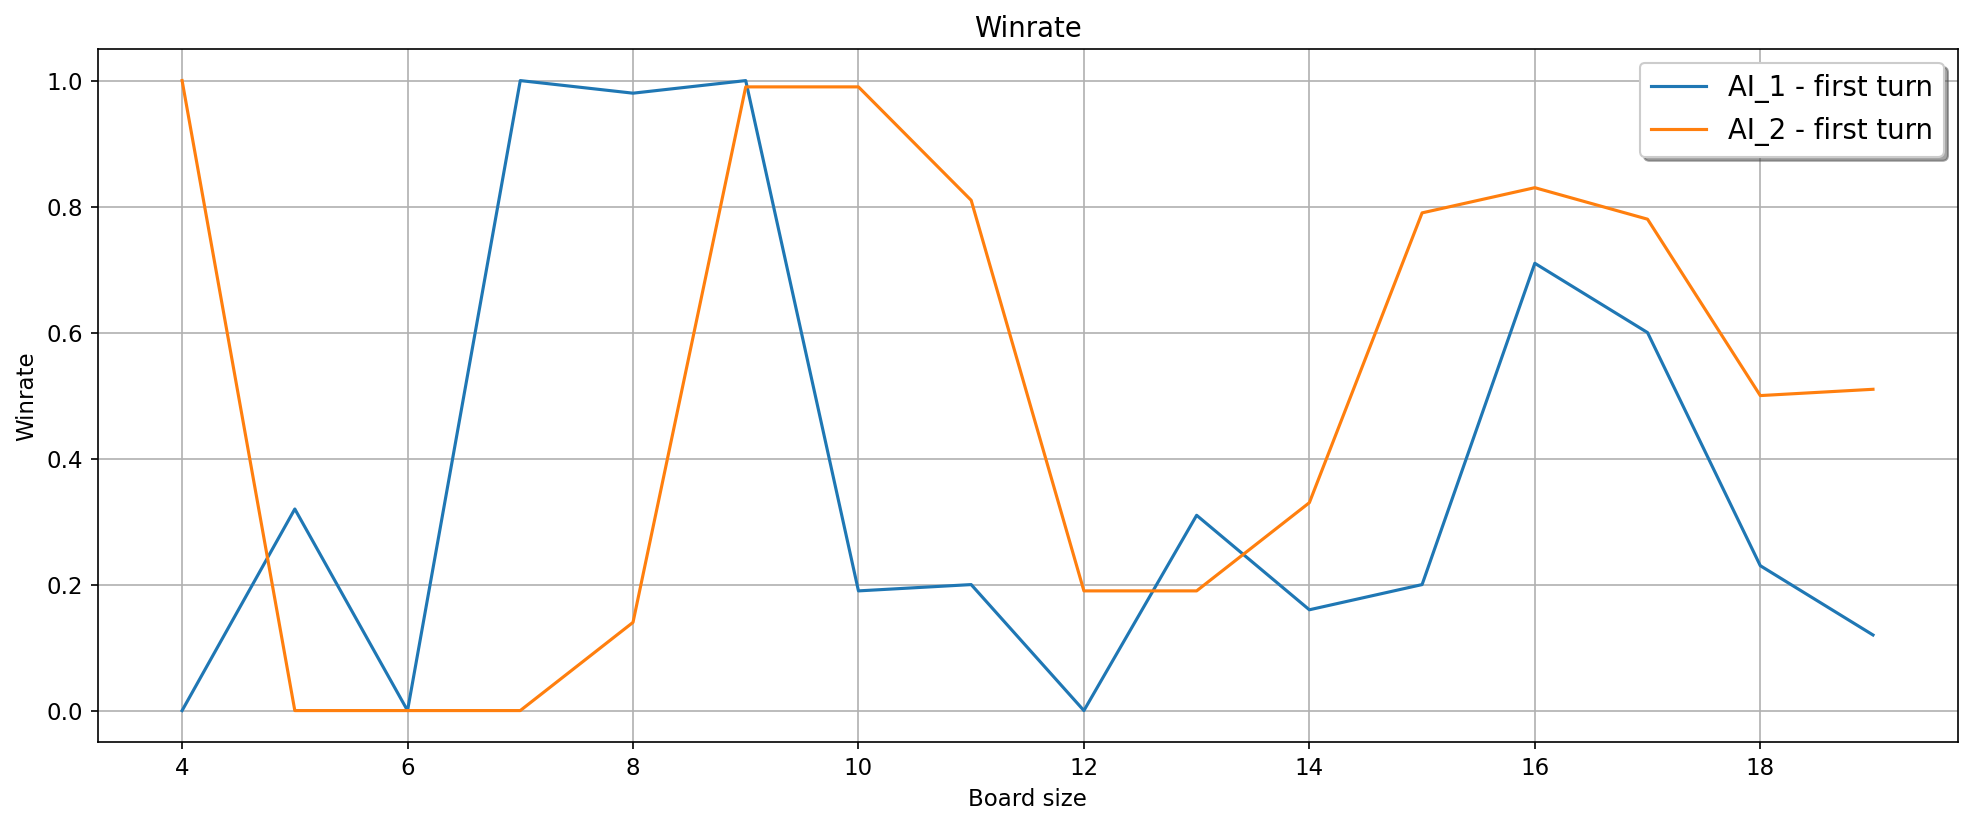

In [1]:
from IPython.display import clear_output
import math
import networkx as nx
import sys
l = list()
frames = []
import sys
import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random
import sys
sys.setrecursionlimit(10000)

class tiktiktoe:
    def __init__(self, size):
        self.board = [0]*size
        self.turn = 1
        self.size=size
        self.depth=0
        self.depths=[]
        self.save_states=[]
        self.graph_matr=[]
        self.matr_unset={}
        self.l=[]
        self.path=[]
        self.player=1
        self.winning_nodes=[]
        self.side="left"
    def display_board(self):
            # Display the column numbers above the board
            col_nums = ' '.join(str(i).center(2) for i in range(self.size))
            print(' ' + col_nums.rjust(self.size*2+1))

            # Display the board with '||' separating each cell
            board_str = '|' + '|'.join(str(x).center(2) for x in self.board) + '|'
            print(board_str)


    def make_move(self,position):
#         board=self.board.copy()
        if self.board[position] == 0:
            self.board[position] = 1  #self.turn
#             self.board=board.copy()
        else:
            print('\nThis position is already taken. Please choose another one.\n')
        
    def get_winner(self):
        state=0
        for place in range(len(self.board)-2):
            if self.board[place]!=0 and self.board[place+1]!=0 and self.board[place+2]!=0:
                if self.turn == 1:
                    return 1
        return None
    
    def bfs(graph, start, end, l):
        queue = []
        queue.append([start])
        #print("BFS_start")
        while queue:
            path = queue.pop(0)
            node = path[-1]
            l.append(path)
            #print(path)
            if node == end:
                return path
            for adjacent in graph.get(node, []):
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)
        
    
    def matrix_to_unset(self):
        graph = {}
        num_nodes = len(self.graph_matr)
        self.graph_matr[0][0]=0 #костыль чтобы убрать связь 0 с 0 

        for i in range(num_nodes):
            node = i
            neighbors = []
            for j in range(num_nodes):
                if self.graph_matr[i][j] != 0:
                    neighbors.append(j)
            graph[node] = neighbors
        self.matr_unset=graph.copy()
    
    def get_node_depths(self):
        # Create an array to store the depth of each node
        self.matrix_to_unset()
#         print(self.matr_unset)
        depth_array = [-1] * len(self.matr_unset)

        # Define a helper function to traverse the tree recursively
        def traverse(node, depth):
#             print("node",node,"depth",depth)
            depth_array[node] = depth
#             print("depth", depth)
            for child in self.matr_unset[node]:
#                 print("child",child,"self.matr_unset[node]",self.matr_unset[node])
                traverse(child, depth+1)

        # Start the traversal from the root node (position 0)
        traverse(0, 0)
        self.depths=depth_array.copy()
#         print("self.depths", self.depths)
    
    
    def generate_win_locations(self):
#         print("generate_win_locations")
        winning_nodes = [0] * len(self.save_states)
        for parent in self.matr_unset:
            pos = self.save_states[parent]
#             print("parent", parent)
            if winning_nodes[parent]!=2:
                for j in range(len(pos) - 2):
                    if pos[j] == pos[j+1] == pos[j+2] == 1:
                        winning_nodes[parent] = 1
                        for child in self.matr_unset[parent]:
                            winning_nodes[child] = 2
#                             print("winning_nodes[child]",winning_nodes[child])
                        break
        self.winning_nodes=winning_nodes.copy()
#         print("winning_nodes", winning_nodes)
        
    def find_win_basic(self):
        for j in range(len(self.board) - 2):
            if   (self.board[j] == self.board[j+1] == 1) and (self.board[j+2]==0):
#                 print("WIN 110")
                return j+2
            elif (self.board[j] == self.board[j+2] == 1) and (self.board[j+1]==0):
#                 print("WIN 101")
                return j+1
            elif (self.board[j+1] == self.board[j+2] == 1) and (self.board[j]==0):
#                 print("WIN 011")
                return j
        self.generate_graph()
        self.matrix_to_unset()
        self.get_node_depths()
#         print("self.matr_unset",len(self.matr_unset),self.matr_unset)
        if len(self.matr_unset)==1:
            for slot in range(len(self.board)-1):
                if self.board[slot]==0:
#                     print("return "+str(slot)+" else ERROR")
                    return slot
#         self.generate_win_locations()
#         print("self.board",self.board)
#         print("self.graph_matr",self.graph_matr)
#         print("self.matr_unset local",len(self.matr_unset),self.matr_unset)
#         print("self.save_states", self.save_states)
#         print("self.depths",self.depths)
#         print("self.winning_nodes", self.winning_nodes)
        #print("depths",self.depths)
        #print("save_states",self.save_states)
        #print("self.winning_nodes",self.winning_nodes)
        #print("len",len(self.save_states))
#         if self.side=="left":
#             self.side="right"
#             run=range(len(self.depths)-1)
#         else:
#             self.side="left"
        run=reversed(range(len(self.depths)-1))
        #print("len depths",len(self.depths))
        for i in run:
#         for i in range(len(self.depths)):
#             print("self.depths", self.depths)
#             if (self.depths[i] % 2 !=0 ) and (self.winning_nodes[i]==1):
            if (self.depths[i] % 2 == 0 ) and (self.depths[i] > 0):
#                 print("Win possible:")
                self.path=bfs(self.matr_unset, 0, i, self.l)
#                 print("self.path", self.path)
#                 for each in self.path:
#                     print("self.save_states", self.save_states[each])
                for i in range(len(self.board)):
                    if self.board[i] != self.save_states[self.path[1]][i]:
        #                     print("self.board["+str(i)+"]", self.board[i])
        #                     print("self.save_states[self.path[1]]["+str(i)+"]",self.save_states[self.path[1]][i])
                        return i
                return -1  # return -1 if no changes were found
            
#         print("Win impossible:")
#         print("self.graph_matr", self.graph_matr)
        self.path=bfs(self.matr_unset, 0, len(self.matr_unset)-1, self.l)
#         print("self.path", self.path)
#         for each in self.path:
#             print("self.save_states", self.save_states[each])

        for i in range(len(self.board)):
            if self.board[i] != self.save_states[self.path[1]][i]:
#                     print("self.board["+str(i)+"]", self.board[i])
#                     print("self.save_states[self.path[1]]["+str(i)+"]",self.save_states[self.path[1]][i])
                return i
        return -1  # return -1 if no changes were found

    
    def check_win(self, borad):
        for i in range(len(borad) - 2):
            if borad[i:i+3] == [1, 1, 1]:
                return 1
        return 0
    
    def pre_win(self, borad):
        for i in range(len(borad) - 1):
            if borad[i:i+2] == [1, 1]:
                return 1
        for i in range(len(borad) - 2):
            if borad[i:i+3] == [1, 0, 1]:
                return 1
        return 0
#       def generate_graph(self):
#         empty_spaces = self.board.count(0)
#         save_states=[]
#         save_states.append(self.board.copy())
#         parent=0
#         graph_matr=[[0,0],[0,0]]
#         end_cnt=0
#         child=1
#         save_st_tmp=self.board.copy()
#         while parent<=(len(save_states)-1):
#             for i in range(len(self.board)):
#  
#                 else: 
#                     print("child", child)
#                     print("len(save_states)", len(save_states))
#                     if child>len(save_states):
#                         break
#                     graph_matr[parent][child]=0
# #             if parent==child:
# #                 break
#             parent+=1
#         graph_matr.pop(-1)
#         self.save_states=save_states.copy()
#         self.graph_matr=graph_matr.copy()
#         print("graph_matr", graph_matr)
#         print("save_states",save_states)
#         return  save_states, graph_matr  
    
    def generate_graph(self):
        empty_spaces = self.board.count(0)
        save_states=[]
        save_states.append(self.board.copy())
        parent=0
        graph_matr=[[0,0],[0,0]]
        end_cnt=0
        child=0
        save_st_tmp=self.board.copy()
#         print("board",self.board)
    
        def generate_children(parent, board, graph_matr, child):
            counter=0
            for space in range(len(board)):
                if board[space]==0:
                    save_st_tmp=board.copy()
#                     print("save_st_tmp_before", save_st_tmp)
                    save_st_tmp[space]=1
#                     print("save_st_tmp_tmp_after", save_st_tmp)
#                     print("save_states_before",save_states)
                    if self.pre_win(save_st_tmp)==0:
                        counter+=1
#                         print("counter", counter)
                        save_states.append(save_st_tmp.copy())
                        graph_matr.append([0] * (len(graph_matr[0])))
                        for row in graph_matr:
                            row.append(0)
                        child+=1
                        graph_matr[parent][child]=1 
                    else:
                        save_st_tmp[space]=0
#                         print("graph_matr["+str(parent)+"]["+str(child)+"] = ", graph_matr[parent][child])
#                     print("save_states_after",save_states)
#                     print("len(graph_matr)", len(graph_matr), "\n", "graph_matr", graph_matr)
#                     print("parent", parent)
#                     print("child", child)
            if counter == 0:
#                 print("\nEND GEN")
                graph_matr.pop(-1)
                self.save_states=save_states.copy()
                self.graph_matr=graph_matr.copy()
#                 print("graph_matr", len(graph_matr), graph_matr)
#                 print("save_states",len(save_states), save_states)
#                 print("END GEN LOG __________\n")
                return
            else:
#                 print("\nContinue gen")
                self.save_states=save_states.copy()
                self.graph_matr=graph_matr.copy()
#                 print("graph_matr", len(graph_matr), graph_matr)
#                 print("save_states",len(save_states),save_states)
#                 print("end continue gen log_______\n")
                parent+=1
#                 print("save_states["+str(parent)+"]", save_states[parent])
                generate_children(parent, save_states[parent], graph_matr, child)

                    
                
        generate_children(parent, self.board, graph_matr, child)

#         print("graph_matr", self.graph_matr)
#         print("save_states",save_states)
        return  save_states, graph_matr              


            


def matrix_to_unset(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        node = i
        neighbors = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                neighbors.append(j)
        graph[node] = neighbors
    return graph

def bfs(graph, start, end, l):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        l.append(path)
        #print(path)
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)



            
            
# __________________________________________
# MAIN GAME CODE

# create a new game 
game = tiktiktoe(3)
# game.make_move(1)
# game.display_board()
# game.generate_graph()
# game.find_win_basic()

# print(game.winning_nodes)

# for each in game.path:
#     print("savestates for winning path",each,game.save_states[each])

# l=game.l
# #print('M',M)
# last_non_empty=0
# for k in reversed(sorted(game.matr_unset.keys())):
#     if bool(game.matr_unset[k]):
#         last_non_empty = game.matr_unset[k]
#         break

# #print("game.path", game.path)
# fin_path=bfs(game.matr_unset,0,game.path[-1],l)

# Графические настройки
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11



# # #edge weight labels
# G = nx.Graph(game.matr_unset)
# pos = nx.planar_layout(G)
# edge_labels = nx.get_edge_attributes(G, "weight")
# nx.draw_networkx_edge_labels(G, pos, edge_labels);
# print(G)
# # nx.draw(G, pos, edge_color=color_map);
# j = 0
# prev = None
# visited=[]

# for i,j in G.edges:
#     G.add_edge(i,j, color = 'black')
    
# starting_frame=0
# pos = nx.planar_layout(G)
# j=0
# for path in l:
#     for i in game.path:
#         if prev != None:
#             #G.add_edge(prev, i, color = 'red')
#             #if prev in visited:
#             #    G.add_edge(prev, i, color = 'black')
#             #else:
#             #    G.add_edge(prev, i, color = 'red')
            
# #             if i<=prev:
# #                 print(prev,i)
# #             else:
# #                 G.add_edge(prev, i, color = 'red')
#             if i>prev:
#                 G.add_edge(prev, i, color = 'red')
            
#             edges = G.edges()
#             colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
#             nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
#             #print(G, pos, colors)
#             #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
#             #plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{j:003}.png', dpi = 150, bbox_inches='tight')
#             if starting_frame==0:
#                 starting_frame=j
#             plt.close()
#             visited.append(prev)
#             j=j+1
#         else:
#             pass
#         prev = i
        

# for dot in range(len(game.path)-1):
#     G.add_edge(game.path[dot], game.path[dot+1], color = 'green')

# edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
# nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
# #print(G, pos, colors)
# #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
# #plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png', dpi = 150, bbox_inches='tight')
# #plt.close()
# visited.append(prev)
        

# for i in l:
#     G.add_edge(j, i, color = 'red')
#     j = i

# #склейка кадров

# # for i in range (starting_frame,j):
# #     #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
# #     frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:003}.png')
# #     frames.append(frame)
# # frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png')
# # for i in range (20):
# #     frames.append(frame)

# #Превращаем в гифку

# # frames[0].save(
# #    'R:/fig/graph/test.gif',
# #    save_all = True,
# #    append_images = frames[1:],
# #    optimize = True,
# #    duration = 500,
# #    loop = 0
# # )

# # frames[0].save(
# #     '/Users/died_mau5/Desktop/ZEZIN/TRASH/game.gif',
# #     save_all = True,
# #     append_images = frames[1:],
# #     optimize = True,
# #     duration = 100,
# #     loop = 0
# # 
# nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
# plt.show()

for i in game.path:
    print(game.save_states[i])

# # loop until there's a winner or the board is full
# #game=0
# #game=tiktiktoe(3)
def decktracker(amount, state):
        empty_spaces=[]
        winrate_array=[0]*len(state)
        lossrate_array=[0]*len(state)
        for j in range(len(state)):
            if state[j]==0:
                empty_spaces.append(j)
        for j in (empty_spaces):
            simulation_wins=0
            simulation_loss=0
            for i in range(amount):
                #print("amount")
                #print("i:",i)
                tmp_board=state.copy()
                tmp_board[j]=1
                counter_turn=0
                tmp_empty_spaces=empty_spaces.copy()
                tmp_empty_spaces.remove(j)
                for l in range(len(empty_spaces)):
                    if (check_win(tmp_board)) and (counter_turn==0):
                        simulation_wins+=1
                        #print("simulation_wins at start", simulation_wins)
                        #print("break")
                        break
                    else:
                        #print("tmp_empty_spaces", tmp_empty_spaces)
                        #print("L:", l)
                        k=random.choice(tmp_empty_spaces)
                        tmp_board[k]=1
                        tmp_empty_spaces.remove(k)
                        counter_turn+=1
                        #print("counter_turn:",counter_turn)
                        #print("check_win(",tmp_board,") :  ",check_win(tmp_board),"\n")
                        if check_win(tmp_board):
                            if counter_turn%2!=0:
                                simulation_loss+=1
                                #print("simulation_loss", simulation_loss)
                            elif counter_turn%2==0:
                                simulation_wins+=1
                                #print("simulation_wins", simulation_wins)
                            #print("break")
                            break
            winrate_array[j]=simulation_wins/amount*100
            #lossrate_array[j]=simulation_loss/amount*100
        return winrate_array#,lossrate_array
    
def check_win(state):
    for i in range(len(state) - 2):
        if state[i:i+3] == [1, 1, 1]:
            return 1
    return 0

def get_ai_move(board):
    winrate_array = decktracker(10000, board)
    #print("Winrate_array:",winrate_array)
    max_winrate = max(winrate_array)
    best_moves = [i for i, val in enumerate(winrate_array) if val == max_winrate]
#     print("Best_moves:",best_moves, "Winrate:", max_winrate)
    return random.choice(best_moves)

def play_single_player():
    board = tiktiktoe(21)
    while True:
        print('-'*100,"\n")
        print("Players turn:\n")
        board.display_board()
        human_move = int(input("Enter column: "))
        if board.board[human_move] != 0:
            print("Invalid move. Column is full.")
            continue
        board.make_move(human_move)
        clear_output(wait=True)
        if board.get_winner():
            print("You win!")
            board.display_board()
            break
        print('-'*100,"\n")
        ai_move = get_ai_move(board.board)
        board.make_move(ai_move)
        print(f"AI moves in column {ai_move}")
        board.display_board()
        if board.get_winner():
            print("AI wins!")
            break

def play_AI_competition(starting_ai):
    board = tiktiktoe(7)
    if starting_ai==1:
        while True:
            print('-'*100,"\n")
            print("AI 1 turn:\n")
            board.display_board()
            print("\nAI 1 logs _________________________________________\n")
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            print("_________________________________________\n")
            print(f"AI_1 moves in column {AI1_move}")
            board.display_board()
            if board.get_winner():
                print("AI_1 won!")
                board.display_board()
                break
            print('-'*100,"\n")
            print("\nAI 2 logs _________________________________________\n")
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            print("_________________________________________\n")
            print(f"AI_2 moves in column {AI2_move}")
            board.display_board()
            if board.get_winner():
                print("AI_2 wins!")
                break
    if starting_ai==2:
        while True:
            print('-'*100,"\n")
            print("AI 2 turn:\n")
            board.display_board()
            print("\nAI 2 logs _________________________________________\n")
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            print("_________________________________________\n")
            print(f"AI_2 moves in column {AI2_move}")
            board.display_board()
            if board.get_winner():
                print("AI_2 won!")
                board.display_board()
                break
            print('-'*100,"\n")
            print("\nAI 1 logs _________________________________________\n")
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            print("_________________________________________\n")
            print(f"AI_1 moves in column {AI1_move}")
            board.display_board()
            if board.get_winner():
                print("AI_1 wins!")
                break
                
def play_AI_competition_silent(max_size, starting_ai):
    board = tiktiktoe(max_size)
    if starting_ai==1:
        while True:
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
#             board.display_board()
            if board.get_winner():
                return 1
                break
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
#             board.display_board()
            if board.get_winner():
                return 2
                break
    if starting_ai==2:
        while True:
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
#             board.display_board()
            if board.get_winner():
                return 2
                break
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
#             board.display_board()
            if board.get_winner():
                return 1
                break                
winrate_starting=[]

def plot_game_bias(start_size, max_size, simulation_amount, winrate_starting):
    result=0
    size_winrate=[]
    for starting_ai in [1,2]:
        size_winrate=[]
        print("Starting AI "+str(starting_ai)+":")
        for size in range(start_size, max_size, 1):
            print("Size of the board running:", size)
            counter_ai1=0
            counter_ai2=0
            for i in range(simulation_amount):
#                 print("simulation number_____", i)
                board = tiktiktoe(size)
                result=play_AI_competition_silent(size, starting_ai)
                if result == 1:
                    counter_ai1+=1
                else:
                    counter_ai2+=1
            if starting_ai==1:
                size_winrate.append(counter_ai1/simulation_amount)
            else:
                size_winrate.append(counter_ai2/simulation_amount)
#             print(size_winrate)
        winrate_starting.append(size_winrate)
        print("winrate_starting",winrate_starting)
        
    x=range(start_size, max_size, 1)
    
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams["figure.figsize"] = (16,6) 
    plt.rcParams["axes.grid"] = True # всегда включать сетку на любых новых графиках
    
    clear_output(wait=True)
    
    fig, ax  = plt.subplots()
    
    ax.set_xlabel('Board size')
    ax.set_ylabel('Winrate')

    
    ax.set( title='Winrate')
 
    ax.plot (x[0:len(winrate_starting[0])],winrate_starting[0], label = 'AI_1 - first turn')
    ax.plot (x[0:len(winrate_starting[1])],winrate_starting[1], label = 'AI_2 - first turn')
    
    legend = ax.legend (loc='best', shadow=True, fontsize='large')
    
    plt.show()
            

        

# play_single_player()
# play_AI_competition(1)

plot_game_bias(4, 20, 100, winrate_starting)


In [1]:
from IPython.display import clear_output
import math
import networkx as nx
import sys
l = list()
frames = []
import sys
import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random
import sys
sys.setrecursionlimit(10000)

class tiktiktoe:
    def __init__(self, size):
        self.board = [0]*size
        self.turn = 1
        self.size=size
        self.depth=0
        self.depths=[]
        self.save_states=[]
        self.graph_matr=[]
        self.matr_unset={}
        self.l=[]
        self.path=[]
        self.player=1
        self.winning_nodes=[]
        self.side="left"
    def display_board(self):
            # Display the column numbers above the board
            col_nums = ' '.join(str(i).center(2) for i in range(self.size))
            print(' ' + col_nums.rjust(self.size*2+1))

            # Display the board with '||' separating each cell
            board_str = '|' + '|'.join(str(x).center(2) for x in self.board) + '|'
            print(board_str)


    def make_move(self,position):
#         board=self.board.copy()
        if self.board[position] == 0:
            self.board[position] = 1  #self.turn
#             self.board=board.copy()
        else:
            print('\nThis position is already taken. Please choose another one.\n')
        
    def get_winner(self):
        state=0
        for place in range(len(self.board)-2):
            if self.board[place]!=0 and self.board[place+1]!=0 and self.board[place+2]!=0:
                if self.turn == 1:
                    return 1
        return None
    
    def bfs(graph, start, end, l):
        queue = []
        queue.append([start])
        #print("BFS_start")
        while queue:
            path = queue.pop(0)
            node = path[-1]
            l.append(path)
            #print(path)
            if node == end:
                return path
            for adjacent in graph.get(node, []):
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)
        
    
    def matrix_to_unset(self):
        graph = {}
        num_nodes = len(self.graph_matr)
        self.graph_matr[0][0]=0 #костыль чтобы убрать связь 0 с 0 

        for i in range(num_nodes):
            node = i
            neighbors = []
            for j in range(num_nodes):
                if self.graph_matr[i][j] != 0:
                    neighbors.append(j)
            graph[node] = neighbors
        self.matr_unset=graph.copy()
    
    def get_node_depths(self):
        # Create an array to store the depth of each node
        self.matrix_to_unset()
#         print(self.matr_unset)
        depth_array = [-1] * len(self.matr_unset)

        # Define a helper function to traverse the tree recursively
        def traverse(node, depth):
#             print("node",node,"depth",depth)
            depth_array[node] = depth
#             print("depth", depth)
            for child in self.matr_unset[node]:
#                 print("child",child,"self.matr_unset[node]",self.matr_unset[node])
                traverse(child, depth+1)

        # Start the traversal from the root node (position 0)
        traverse(0, 0)
        self.depths=depth_array.copy()
#         print("self.depths", self.depths)
    
    
    def generate_win_locations(self):
#         print("generate_win_locations")
        winning_nodes = [0] * len(self.save_states)
        for parent in self.matr_unset:
            pos = self.save_states[parent]
#             print("parent", parent)
            if winning_nodes[parent]!=2:
                for j in range(len(pos) - 2):
                    if pos[j] == pos[j+1] == pos[j+2] == 1:
                        winning_nodes[parent] = 1
                        for child in self.matr_unset[parent]:
                            winning_nodes[child] = 2
#                             print("winning_nodes[child]",winning_nodes[child])
                        break
        self.winning_nodes=winning_nodes.copy()
#         print("winning_nodes", winning_nodes)
        
    def find_win_basic(self):
        for j in range(len(self.board) - 2):
            if   (self.board[j] == self.board[j+1] == 1) and (self.board[j+2]==0):
#                 print("WIN 110")
                return j+2
            elif (self.board[j] == self.board[j+2] == 1) and (self.board[j+1]==0):
#                 print("WIN 101")
                return j+1
            elif (self.board[j+1] == self.board[j+2] == 1) and (self.board[j]==0):
#                 print("WIN 011")
                return j
        self.generate_graph()
        self.matrix_to_unset()
        self.get_node_depths()
#         print("self.matr_unset",len(self.matr_unset),self.matr_unset)
        if len(self.matr_unset)==1:
            for slot in range(len(self.board)-1):
                if self.board[slot]==0:
#                     print("return "+str(slot)+" else ERROR")
                    return slot
#         self.generate_win_locations()
#         print("self.board",self.board)
#         print("self.graph_matr",self.graph_matr)
#         print("self.matr_unset local",len(self.matr_unset),self.matr_unset)
#         print("self.save_states", self.save_states)
#         print("self.depths",self.depths)
#         print("self.winning_nodes", self.winning_nodes)
        #print("depths",self.depths)
        #print("save_states",self.save_states)
        #print("self.winning_nodes",self.winning_nodes)
        #print("len",len(self.save_states))
#         if self.side=="left":
#             self.side="right"
#             run=range(len(self.depths)-1)
#         else:
#             self.side="left"
        run=reversed(range(len(self.depths)-1))
        #print("len depths",len(self.depths))
        for i in run:
#         for i in range(len(self.depths)):
#             print("self.depths", self.depths)
#             if (self.depths[i] % 2 !=0 ) and (self.winning_nodes[i]==1):
            if (self.depths[i] % 2 == 0 ) and (self.depths[i] > 0):
#                 print("Win possible:")
                self.path=bfs(self.matr_unset, 0, i, self.l)
#                 print("self.path", self.path)
#                 for each in self.path:
#                     print("self.save_states", self.save_states[each])
                for i in range(len(self.board)):
                    if self.board[i] != self.save_states[self.path[1]][i]:
        #                     print("self.board["+str(i)+"]", self.board[i])
        #                     print("self.save_states[self.path[1]]["+str(i)+"]",self.save_states[self.path[1]][i])
                        return i
                return -1  # return -1 if no changes were found
            
#         print("Win impossible:")
#         print("self.graph_matr", self.graph_matr)
        self.path=bfs(self.matr_unset, 0, len(self.matr_unset)-1, self.l)
#         print("self.path", self.path)
#         for each in self.path:
#             print("self.save_states", self.save_states[each])

        for i in range(len(self.board)):
            if self.board[i] != self.save_states[self.path[1]][i]:
#                     print("self.board["+str(i)+"]", self.board[i])
#                     print("self.save_states[self.path[1]]["+str(i)+"]",self.save_states[self.path[1]][i])
                return i
        return -1  # return -1 if no changes were found

    
    def check_win(self, borad):
        for i in range(len(borad) - 2):
            if borad[i:i+3] == [1, 1, 1]:
                return 1
        return 0
    
    def pre_win(self, borad):
        for i in range(len(borad) - 1):
            if borad[i:i+2] == [1, 1]:
                return 1
        for i in range(len(borad) - 2):
            if borad[i:i+3] == [1, 0, 1]:
                return 1
        return 0
#       def generate_graph(self):
#         empty_spaces = self.board.count(0)
#         save_states=[]
#         save_states.append(self.board.copy())
#         parent=0
#         graph_matr=[[0,0],[0,0]]
#         end_cnt=0
#         child=1
#         save_st_tmp=self.board.copy()
#         while parent<=(len(save_states)-1):
#             for i in range(len(self.board)):
#  
#                 else: 
#                     print("child", child)
#                     print("len(save_states)", len(save_states))
#                     if child>len(save_states):
#                         break
#                     graph_matr[parent][child]=0
# #             if parent==child:
# #                 break
#             parent+=1
#         graph_matr.pop(-1)
#         self.save_states=save_states.copy()
#         self.graph_matr=graph_matr.copy()
#         print("graph_matr", graph_matr)
#         print("save_states",save_states)
#         return  save_states, graph_matr  
    
    def generate_graph(self):
        empty_spaces = self.board.count(0)
        save_states=[]
        save_states.append(self.board.copy())
        parent=0
        graph_matr=[[0,0],[0,0]]
        end_cnt=0
        child=0
        save_st_tmp=self.board.copy()
#         print("board",self.board)
    
        def generate_children(parent, board, graph_matr, child):
            counter=0
            for space in range(len(board)):
                if board[space]==0:
                    save_st_tmp=board.copy()
#                     print("save_st_tmp_before", save_st_tmp)
                    save_st_tmp[space]=1
#                     print("save_st_tmp_tmp_after", save_st_tmp)
#                     print("save_states_before",save_states)
                    if self.pre_win(save_st_tmp)==0:
                        counter+=1
#                         print("counter", counter)
                        save_states.append(save_st_tmp.copy())
                        graph_matr.append([0] * (len(graph_matr[0])))
                        for row in graph_matr:
                            row.append(0)
                        child+=1
                        graph_matr[parent][child]=1 
                    else:
                        save_st_tmp[space]=0
#                         print("graph_matr["+str(parent)+"]["+str(child)+"] = ", graph_matr[parent][child])
#                     print("save_states_after",save_states)
#                     print("len(graph_matr)", len(graph_matr), "\n", "graph_matr", graph_matr)
#                     print("parent", parent)
#                     print("child", child)
            if counter == 0:
#                 print("\nEND GEN")
                graph_matr.pop(-1)
                self.save_states=save_states.copy()
                self.graph_matr=graph_matr.copy()
#                 print("graph_matr", len(graph_matr), graph_matr)
#                 print("save_states",len(save_states), save_states)
#                 print("END GEN LOG __________\n")
                return
            else:
#                 print("\nContinue gen")
                self.save_states=save_states.copy()
                self.graph_matr=graph_matr.copy()
#                 print("graph_matr", len(graph_matr), graph_matr)
#                 print("save_states",len(save_states),save_states)
#                 print("end continue gen log_______\n")
                parent+=1
#                 print("save_states["+str(parent)+"]", save_states[parent])
                generate_children(parent, save_states[parent], graph_matr, child)

                    
                
        generate_children(parent, self.board, graph_matr, child)

#         print("graph_matr", self.graph_matr)
#         print("save_states",save_states)
        return  save_states, graph_matr              


            


def matrix_to_unset(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        node = i
        neighbors = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                neighbors.append(j)
        graph[node] = neighbors
    return graph

def bfs(graph, start, end, l):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        l.append(path)
        #print(path)
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)



            
            
# __________________________________________
# MAIN GAME CODE

# create a new game 
game = tiktiktoe(3)
# game.make_move(1)
# game.display_board()
# game.generate_graph()
# game.find_win_basic()

# print(game.winning_nodes)

# for each in game.path:
#     print("savestates for winning path",each,game.save_states[each])

# l=game.l
# #print('M',M)
# last_non_empty=0
# for k in reversed(sorted(game.matr_unset.keys())):
#     if bool(game.matr_unset[k]):
#         last_non_empty = game.matr_unset[k]
#         break

# #print("game.path", game.path)
# fin_path=bfs(game.matr_unset,0,game.path[-1],l)

# Графические настройки
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11



# # #edge weight labels
# G = nx.Graph(game.matr_unset)
# pos = nx.planar_layout(G)
# edge_labels = nx.get_edge_attributes(G, "weight")
# nx.draw_networkx_edge_labels(G, pos, edge_labels);
# print(G)
# # nx.draw(G, pos, edge_color=color_map);
# j = 0
# prev = None
# visited=[]

# for i,j in G.edges:
#     G.add_edge(i,j, color = 'black')
    
# starting_frame=0
# pos = nx.planar_layout(G)
# j=0
# for path in l:
#     for i in game.path:
#         if prev != None:
#             #G.add_edge(prev, i, color = 'red')
#             #if prev in visited:
#             #    G.add_edge(prev, i, color = 'black')
#             #else:
#             #    G.add_edge(prev, i, color = 'red')
            
# #             if i<=prev:
# #                 print(prev,i)
# #             else:
# #                 G.add_edge(prev, i, color = 'red')
#             if i>prev:
#                 G.add_edge(prev, i, color = 'red')
            
#             edges = G.edges()
#             colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
#             nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
#             #print(G, pos, colors)
#             #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
#             #plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{j:003}.png', dpi = 150, bbox_inches='tight')
#             if starting_frame==0:
#                 starting_frame=j
#             plt.close()
#             visited.append(prev)
#             j=j+1
#         else:
#             pass
#         prev = i
        

# for dot in range(len(game.path)-1):
#     G.add_edge(game.path[dot], game.path[dot+1], color = 'green')

# edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
# nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
# #print(G, pos, colors)
# #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
# #plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png', dpi = 150, bbox_inches='tight')
# #plt.close()
# visited.append(prev)
        

# for i in l:
#     G.add_edge(j, i, color = 'red')
#     j = i

# #склейка кадров

# # for i in range (starting_frame,j):
# #     #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
# #     frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:003}.png')
# #     frames.append(frame)
# # frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png')
# # for i in range (20):
# #     frames.append(frame)

# #Превращаем в гифку

# # frames[0].save(
# #    'R:/fig/graph/test.gif',
# #    save_all = True,
# #    append_images = frames[1:],
# #    optimize = True,
# #    duration = 500,
# #    loop = 0
# # )

# # frames[0].save(
# #     '/Users/died_mau5/Desktop/ZEZIN/TRASH/game.gif',
# #     save_all = True,
# #     append_images = frames[1:],
# #     optimize = True,
# #     duration = 100,
# #     loop = 0
# # 
# nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
# plt.show()

for i in game.path:
    print(game.save_states[i])

# # loop until there's a winner or the board is full
# #game=0
# #game=tiktiktoe(3)
def decktracker(amount, state):
        empty_spaces=[]
        winrate_array=[0]*len(state)
        lossrate_array=[0]*len(state)
        for j in range(len(state)):
            if state[j]==0:
                empty_spaces.append(j)
        for j in (empty_spaces):
            simulation_wins=0
            simulation_loss=0
            for i in range(amount):
                #print("amount")
                #print("i:",i)
                tmp_board=state.copy()
                tmp_board[j]=1
                counter_turn=0
                tmp_empty_spaces=empty_spaces.copy()
                tmp_empty_spaces.remove(j)
                for l in range(len(empty_spaces)):
                    if (check_win(tmp_board)) and (counter_turn==0):
                        simulation_wins+=1
                        #print("simulation_wins at start", simulation_wins)
                        #print("break")
                        break
                    else:
                        #print("tmp_empty_spaces", tmp_empty_spaces)
                        #print("L:", l)
                        k=random.choice(tmp_empty_spaces)
                        tmp_board[k]=1
                        tmp_empty_spaces.remove(k)
                        counter_turn+=1
                        #print("counter_turn:",counter_turn)
                        #print("check_win(",tmp_board,") :  ",check_win(tmp_board),"\n")
                        if check_win(tmp_board):
                            if counter_turn%2!=0:
                                simulation_loss+=1
                                #print("simulation_loss", simulation_loss)
                            elif counter_turn%2==0:
                                simulation_wins+=1
                                #print("simulation_wins", simulation_wins)
                            #print("break")
                            break
            winrate_array[j]=simulation_wins/amount*100
            #lossrate_array[j]=simulation_loss/amount*100
        return winrate_array#,lossrate_array
    
def check_win(state):
    for i in range(len(state) - 2):
        if state[i:i+3] == [1, 1, 1]:
            return 1
    return 0

def get_ai_move(board):
    winrate_array = decktracker(1000, board)
    #print("Winrate_array:",winrate_array)
    max_winrate = max(winrate_array)
    best_moves = [i for i, val in enumerate(winrate_array) if val == max_winrate]
#     print("Best_moves:",best_moves, "Winrate:", max_winrate)
    return random.choice(best_moves)

def play_single_player(AI_number, size):
    board = tiktiktoe(size)
    if AI_number==1:
        while True:
            print('-'*100,"\n")
            print("Players turn:\n")
            board.display_board()
            human_move = int(input("Enter column: "))
            if board.board[human_move] != 0:
                print("Invalid move. Column is full.")
                continue
            board.make_move(human_move)
            clear_output(wait=True)
            if board.get_winner():
                print("You win!")
                board.display_board()
                break
            print('-'*100,"\n")
            ai_move = get_ai_move(board.board)
            board.make_move(ai_move)
            print(f"AI moves in column {ai_move}")
            board.display_board()
            if board.get_winner():
                print("AI wins!")
                break
    else:
        while True:
            print('-'*100,"\n")
            print("Players turn:\n")
            board.display_board()
            human_move = int(input("Enter column: "))
            if board.board[human_move] != 0:
                print("Invalid move. Column is full.")
                continue
            board.make_move(human_move)
            clear_output(wait=True)
            if board.get_winner():
                print("You win!")
                board.display_board()
                break
            print('-'*100,"\n")
            ai_move = board.find_win_basic()
            board.make_move(ai_move)
            print(f"AI moves in column {ai_move}")
            board.display_board()
            if board.get_winner():
                print("AI wins!")
                break

def play_AI_competition(starting_ai):
    board = tiktiktoe(7)
    if starting_ai==1:
        while True:
            print('-'*100,"\n")
            print("AI 1 turn:\n")
            board.display_board()
            print("\nAI 1 logs _________________________________________\n")
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            print("_________________________________________\n")
            print(f"AI_1 moves in column {AI1_move}")
            board.display_board()
            if board.get_winner():
                print("AI_1 won!")
                board.display_board()
                break
            print('-'*100,"\n")
            print("\nAI 2 logs _________________________________________\n")
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            print("_________________________________________\n")
            print(f"AI_2 moves in column {AI2_move}")
            board.display_board()
            if board.get_winner():
                print("AI_2 wins!")
                break
    if starting_ai==2:
        while True:
            print('-'*100,"\n")
            print("AI 2 turn:\n")
            board.display_board()
            print("\nAI 2 logs _________________________________________\n")
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
            print("_________________________________________\n")
            print(f"AI_2 moves in column {AI2_move}")
            board.display_board()
            if board.get_winner():
                print("AI_2 won!")
                board.display_board()
                break
            print('-'*100,"\n")
            print("\nAI 1 logs _________________________________________\n")
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
            print("_________________________________________\n")
            print(f"AI_1 moves in column {AI1_move}")
            board.display_board()
            if board.get_winner():
                print("AI_1 wins!")
                break
                
def play_AI_competition_silent(max_size, starting_ai):
    board = tiktiktoe(max_size)
    if starting_ai==1:
        while True:
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
#             board.display_board()
            if board.get_winner():
                return 1
                break
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
#             board.display_board()
            if board.get_winner():
                return 2
                break
    if starting_ai==2:
        while True:
            AI2_move = get_ai_move(board.board)
            board.make_move(AI2_move)
#             board.display_board()
            if board.get_winner():
                return 2
                break
            AI1_move = board.find_win_basic()
            board.make_move(AI1_move)
#             board.display_board()
            if board.get_winner():
                return 1
                break                
winrate_starting=[]

def plot_game_bias(start_size, max_size, simulation_amount, winrate_starting):
    result=0
    size_winrate=[]
    for starting_ai in [1,2]:
        size_winrate=[]
        print("Starting AI "+str(starting_ai)+":")
        for size in range(start_size, max_size, 1):
            print("Size of the board running:", size)
            counter_ai1=0
            counter_ai2=0
            for i in range(simulation_amount):
#                 print("simulation number_____", i)
                board = tiktiktoe(size)
                result=play_AI_competition_silent(size, starting_ai)
                if result == 1:
                    counter_ai1+=1
                else:
                    counter_ai2+=1
            if starting_ai==1:
                size_winrate.append(counter_ai1/simulation_amount)
            else:
                size_winrate.append(counter_ai2/simulation_amount)
#             print(size_winrate)
        winrate_starting.append(size_winrate)
        print("winrate_starting",winrate_starting)
        
    x=range(start_size, max_size, 1)
    
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams["figure.figsize"] = (16,6) 
    plt.rcParams["axes.grid"] = True # всегда включать сетку на любых новых графиках
    
    clear_output(wait=True)
    
    fig, ax  = plt.subplots()
    
    ax.set_xlabel('Board size')
    ax.set_ylabel('Winrate')

    
    ax.set( title='Winrate')
 
    ax.plot (x[0:len(winrate_starting[0])],winrate_starting[0], label = 'AI_1 - first turn')
    ax.plot (x[0:len(winrate_starting[1])],winrate_starting[1], label = 'AI_2 - first turn')
    
    legend = ax.legend (loc='best', shadow=True, fontsize='large')
    
    plt.show()
            

        

# play_single_player(2, 5)
# play_AI_competition(1)

plot_game_bias(4, 20, 100, winrate_starting)


Starting AI 1:
Size of the board running: 4
Size of the board running: 5
Size of the board running: 6


KeyboardInterrupt: 

In [14]:
# game.save_states[8972]
print(game.path)
print(game.depths)
print(game.matr_unset)
print(bfs(game.matr_unset, 0, len(game.depths)-1, game.l))

[]
[]
{}
None


In [ ]:
    def generate_graph(self):
        empty_spaces = self.board.count(0)
        save_states=[]
        save_states.append(self.board.copy())
        parent=0
        graph_matr=[[0,0],[0,0]]
        end_cnt=0
        child=1
        save_st_tmp=self.board.copy()
        while parent<=(len(save_states)-1):
            for i in range(len(self.board)):
                if save_states[parent][i]==0:
                    save_st_tmp=save_states[parent].copy()
                    save_st_tmp[i]=1
                    print("save_st_tmp", save_st_tmp)
                    if self.check_win(save_st_tmp)==0:
                        save_states.append(save_st_tmp.copy())
                        graph_matr[parent][child]=1 
                        graph_matr.append([0] * (len(graph_matr[0])))
                        for row in graph_matr:
                            row.append(0)
                    else:
                        save_st_tmp[i]=0
                        graph_matr[parent][child]=0
#                         print("graph_matr["+str(parent)+"]["+str(child)+"] = ", graph_matr[parent][child])
#                     print("len(graph_matr)", len(graph_matr), "\n", "graph_matr", graph_matr)
                    print("parent", parent)
                    print("child", child)
                    child+=1
                else: 
                    print("child", child)
                    print("len(save_states)", len(save_states))
                    if child>len(save_states):
                        break
                    graph_matr[parent][child]=0
#             if parent==child:
#                 break
            parent+=1
        graph_matr.pop(-1)
        self.save_states=save_states.copy()
        self.graph_matr=graph_matr.copy()
        print("graph_matr", graph_matr)
        print("save_states",save_states)
        return  save_states, graph_matr  

In [ ]:
graph = {0: [1, 2, 3], 1: [4, 5], 2: [6, 7], 3: [8, 9], 4: [10], 5: [11], 6: [12], 7: [13], 8: [14], 9: [15], 10: [], 11: [], 12: [], 13: [], 14: [], 15: []}
states = [[1, 0, 0, 0], [1, 1, 0, 0], [1, 0, 1, 0], [1, 0, 0, 1], [1, 1, 1, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [1, 0, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1], [1, 1, 1, 1]]

winning_nodes = [0] * len(states)

for parent in graph:
    pos = states[parent]
    if winning_nodes[parent]!=2:
        for j in range(len(pos) - 2):
            if pos[j] == pos[j+1] == pos[j+2] == 1:
                winning_nodes[parent] = 1
                for child in graph[parent]:
                    winning_nodes[child] = 2
                break

print(winning_nodes)


In [ ]:
print(len(game.depths))
print(len(game.save_states))
print(len(game.matr_unset))

print("game.depths",game.depths)
print("game.save_states",game.save_states)
print("game.matr_unset",game.matr_unset)



In [ ]:
from IPython.display import clear_output
import math
import networkx as nx
import sys
l = list()
frames = []
import sys
import numpy as np 
import matplotlib.pyplot as plt
import glob
from PIL import Image

class tiktiktoe:
    def __init__(self, size):
        self.board = [0]*size
        self.turn = 1
        self.size=size
        self.depth=0
        self.depths=[]
        self.save_states=[]
        self.graph_matr=[]
        self.matr_unset={}
        self.l=[]
        self.path=[]
        self.player=1
    def display_board(self):
        for i in range(0, self.size**2, self.size):
            print('|'.join(str(x) for x in self.board[i:i+self.size]))
    def make_move(self,position):
        if self.board[position] == 0:
            self.board[position] = self.turn
            if self.turn == 1:
                print("\nPlayer 1 placed in location:",position,"\n")
                self.turn = 2
            else:
                print("\nPlayer 2 placed in location:",position,"\n")
                self.turn = 1
        else:
            print('\nThis position is already taken. Please choose another one.\n')
        
    def get_winner(self):
        state=0
        for place in range(len(self.board)-2):
            if self.board[place]!=0 and self.board[place+1]!=0 and self.board[place+2]!=0:
                if self.turn == 1:
                    return 2
                else: return 1
        return None
    
    def bfs(graph, start, end, l):
        queue = []
        queue.append([start])
        #print("BFS_start")
        while queue:
            path = queue.pop(0)
            node = path[-1]
            l.append(path)
            #print(path)
            if node == end:
                return path
            for adjacent in graph.get(node, []):
                new_path = list(path)
                new_path.append(adjacent)
                queue.append(new_path)
        
    
    def matrix_to_unset(self):
        graph = {}
        num_nodes = len(self.graph_matr)
        self.graph_matr[0][0]=0 #костыль чтобы убрать связь 0 с 0 

        for i in range(num_nodes):
            node = i
            neighbors = []
            for j in range(num_nodes):
                if self.graph_matr[i][j] != 0:
                    neighbors.append(j)
            graph[node] = neighbors
        self.matr_unset=graph.copy()
    
    def get_node_depths(self):
        # Create an array to store the depth of each node
        self.matrix_to_unset()
        #print(self.matr_unset)
        depth_array = [-1] * len(self.matr_unset)

        # Define a helper function to traverse the tree recursively
        def traverse(node, depth):
            #print("node",node,"depth",depth)
            depth_array[node] = depth
            for child in self.matr_unset[node]:
                traverse(child, depth+1)

        # Start the traversal from the root node (position 0)
        traverse(0, 0)
        self.depths=depth_array.copy()
    
    
        
        
    def find_win_basic(self, player_input):
        self.generate_graph(player_input)
        self.matrix_to_unset()
        self.get_node_depths()
        print("depths",self.depths)
        print("save_states",self.save_states)
        print("len",len(self.save_states))
        print("len depths",len(self.depths))
        win_exists = False
        winning_positions=[]
        # Iterate over each position in the state list
        for i, pos in enumerate(self.save_states):
            print("i",i,"pos",pos)
            if (self.depths[i] % 2 !=0) and (pos.count(1) >= 3) and (self:
                for j in range(len(pos) - 3):
                    if (pos[j] == pos[j+1] == pos[j+2] == 1):
                        if i in winning_positions:
                            win_exists = True
                            break
                        self.path=bfs(self.matr_unset, 0, i, self.l)
                        winning_positions.append(i)
                        return
            if win_exists:
                break
            
                
    def check_win(self, state):
        win_cnt=0
        for i in range(len(state) - len([1, 1, 1]) + 1):
            if state[i:i+len([1, 1, 1])] == [1, 1, 1]:
                win_cnt+=1
                #return 1
        return win_cnt
        
    
    def generate_graph(self, player_input):
        self.player=player_input
        empty_spaces = self.board.count(0)
        save_states=[]
        save_states.append(self.board.copy())
        parent=0
        graph_matr=[[0,0],[0,0]]
        end_cnt=0
        child=1
        save_st_tmp=self.board.copy()
        if self.depth==0:
           # while end_cnt <= math.factorial(empty_spaces):
                while parent<=(len(save_states)-1):
                    for i in range(len(self.board)):
                        #print("save_states", save_states)
                        #print("\nsave_states[parent][i]",save_states[parent][i])
                        
                        if save_states[parent][i]==0:
                            save_st_tmp=save_states[parent].copy()
                            save_st_tmp[i]=1
                            save_states.append(save_st_tmp.copy())

                            #print("\nparent", parent)
                            #print("\nchild", child) 
                            
                        
                            graph_matr[parent][child]=1 
                            #print("graph_matr["+str(parent)+"]["+str(child)+"]",graph_matr[parent][child])
                            child+=1
                            graph_matr.append([0] * (len(graph_matr[0])))
                            for row in graph_matr:
                                row.append(0)
                        else: 
                            #print("parent", parent)
                            #print("child", child)
                            graph_matr[parent][child]=0
                            #print("graph_matr["+str(parent)+"]["+str(child)+"]",graph_matr[parent][child])
                            #child+=1
                            
                    #print("parent", parent)
                    #print("save_states["+str(parent)+"]", save_states[parent])
                    #print("graph_matr ["+str(parent)+"]", graph_matr[parent])
                    if self.check_win(save_states[parent]):
                        end_cnt+=1
                        #print("end_cnt",end_cnt)
                    if parent==child:
                        break
                    parent+=1
        #print("save_states",save_states)
        #print("graph_matr",graph_matr)
        graph_matr.pop(-1)
        self.save_states=save_states.copy()
        self.graph_matr=graph_matr.copy()
        return  save_states, graph_matr              
        
                    


def matrix_to_unset(matrix):
    graph = {}
    num_nodes = len(matrix)
    
    for i in range(num_nodes):
        node = i
        neighbors = []
        for j in range(num_nodes):
            if matrix[i][j] != 0:
                neighbors.append(j)
        graph[node] = neighbors
    return graph

def bfs(graph, start, end, l):
    queue = []
    queue.append([start])
    while queue:
        path = queue.pop(0)
        node = path[-1]
        l.append(path)
        #print(path)
        if node == end:
            return path
        for adjacent in graph.get(node, []):
            new_path = list(path)
            new_path.append(adjacent)
            queue.append(new_path)



            
            
#__________________________________________
#MAIN GAME CODE

# create a new game with board size of 9
game = tiktiktoe(4)
#game.make_move(0)


#game.make_move(2)

# print the initial board
game.display_board()
# data=game.generate_graph(1)

# game.get_node_depths()

game.find_win_basic(1)

#print("graph_matr", game.graph_matr)
#print("graph_unset", game.matr_unset)

#print("game.depths", game.depths)

#print("data",data)

for each in game.path:
    print("savestates for winning path",each,game.save_states[each])

l=game.l
#print('M',M)
last_non_empty=0
for k in reversed(sorted(game.matr_unset.keys())):
    if bool(game.matr_unset[k]):
        last_non_empty = game.matr_unset[k]
        break

#print("game.path", game.path)
fin_path=bfs(game.matr_unset,0,game.path[-1],l)

# Графические настройки
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11



#edge weight labels
G = nx.Graph(game.matr_unset)
pos = nx.planar_layout(G)
edge_labels = nx.get_edge_attributes(G, "weight")
#nx.draw_networkx_edge_labels(G, pos, edge_labels);
#print(G)
#nx.draw(G, pos, edge_color=color_map);
j = 0
prev = None
visited=[]

for i,j in G.edges:
    G.add_edge(i,j, color = 'black')
    
starting_frame=0
pos = nx.planar_layout(G)
j=0
for path in l:
    for i in path:
        if prev != None:
            #G.add_edge(prev, i, color = 'red')
            #if prev in visited:
            #    G.add_edge(prev, i, color = 'black')
            #else:
            #    G.add_edge(prev, i, color = 'red')
            
#             if i<=prev:
#                 print(prev,i)
#             else:
#                 G.add_edge(prev, i, color = 'red')
            if i>prev:
                G.add_edge(prev, i, color = 'red')
            
            edges = G.edges()
            colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
            nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
            #print(G, pos, colors)
            #plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
#             plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{j:003}.png', dpi = 150, bbox_inches='tight')
            if starting_frame==0:
                starting_frame=j
            plt.close()
            visited.append(prev)
            j=j+1
        else:
            pass
        prev = i
        

for dot in range(len(path)-1):
    G.add_edge(path[dot], path[dot+1], color = 'green')

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges] #Видимо делает лист цвета, но для граней
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
#print(G, pos, colors)
#plt.savefig(f'R:/fig/graph/Figure_{j:02}.png', dpi = 150, bbox_inches='tight')
# plt.savefig(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png', dpi = 150, bbox_inches='tight')
plt.close()
visited.append(prev)
        

# for i in l:
#     G.add_edge(j, i, color = 'red')
#     j = i

#склейка кадров

# for i in range (starting_frame,j):
#     #frame = Image.open(f'R:/fig/graph/Figure_{i:02}.png')
#     frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_{i:003}.png')
#     frames.append(frame)
# frame = Image.open(f'/Users/died_mau5/Desktop/ZEZIN/TRASH/Figure_999.png')
# for i in range (20):
#     frames.append(frame)

#Превращаем в гифку

# frames[0].save(
#    'R:/fig/graph/test.gif',
#    save_all = True,
#    append_images = frames[1:],
#    optimize = True,
#    duration = 500,
#    loop = 0
# )

# frames[0].save(
#     '/Users/died_mau5/Desktop/ZEZIN/TRASH/game.gif',
#     save_all = True,
#     append_images = frames[1:],
#     optimize = True,
#     duration = 100,
#     loop = 0
# )
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)
plt.show()

# loop until there's a winner or the board is full
while not game.get_winner() and 0 in game.board:
    # get the current player's move
    position = int(input("Player " + str(game.turn) + " - Enter a position to place your mark: "))

    # make the move
    game.make_move(position)

    # print the updated board
    game.display_board()

    # clear the output
    clear_output(wait=True)

# check if there's a winner or if the board is full
if game.get_winner():
    print("Player " + str(game.get_winner()) + " wins!")




In [ ]:
graph = {
    0: [1, 2, 3],
    1: [4, 5],
    2: [6, 7],
    3: [8, 9],
    4: [10],
    5: [11],
    6: [12],
    7: [13],
    8: [14],
    9: [15],
    10: [],
    11: [],
    12: [],
    13: [],
    14: [],
    15: [],
    16: []
}
depths = [0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, -1]
state = [[1, 0, 0, 0],
         [1, 1, 0, 0],
         [1, 0, 1, 0],
         [1, 0, 0, 1],
         [1, 1, 1, 0],
         [1, 1, 0, 1],
         [1, 1, 1, 0],
         [1, 0, 1, 1],
         [1, 1, 0, 1],
         [1, 0, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]

depths.pop(-1)


print(len(depths))

print(len(state))

print(len(graph))



def fast(state,depths):
    for i, pos in enumerate(state):
        if depths[i] % 2 == 0 and pos.count(1) >= 3:
            for j in range(len(pos) - 2):
                if pos[j] == pos[j+1] == pos[j+2] == 1:
                    print(f"The first winning position is {i}.")
                    return 
                
fast(state,depths)


# Print the first winning position found, if any


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams["font.size"] = 11

pos = nx.planar_layout(G)
nx.draw_networkx(G, pos, with_labels=True, edge_color=colors, width=1, font_size=3, node_size=5)

In [ ]:
def get_node_depth(tree):
    # Create an array to store the depth of each node
    depth_array = [-1] * len(tree)

    # Define a helper function to traverse the tree recursively
    def traverse(node, depth):
        depth_array[node] = depth
        for child in tree[node]:
            traverse(child, depth+1)

    # Start the traversal from the root node (position 0)
    traverse(0, 0)

    return depth_array

maze ={
        0: [1],
        1: [2,10],
        2: [3,4],
        3: [],
        4: [5,6],
        5: [],
        6: [7,8],
        7: [],
        8: [9,13],
        9: [],
        10:[11,12],
        11:[],
        12:[],
        13:[]
        }

get_node_depth(maze)